In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings(action='ignore')
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix


#Load data
df = pd.read_csv('forestfires.csv')
df.head()
     

month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  ...  monthfeb  \
0   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0  ...         0   
1   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0  ...         0   
2   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0  ...         0   
3   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2  ...         0   
4   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0  ...         0   

   monthjan  monthjul  monthjun  monthmar  monthmay  monthnov  monthoct  \
0         0         0         0         1         0         0         0   
1         0         0         0         0         0         0         1   
2         0         0         0         0         0         0         1   
3         0         0         0         1         0         0         0   
4         0         0         0         1         0         0         0   

   monthsep  size_category  
0         0          small  
1         0          small  
2         0          small  
3         0          small  
4         0          small  

[5 rows x 31 columns]

In [2]:

df.shape

(517, 31)

In [3]:
df.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

In [4]:

pd.set_option("display.max_columns", 31)
df.head()

month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area  dayfri  \
0   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0       1   
1   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0       0   
2   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0       0   
3   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0       1   
4   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0       0   

   daymon  daysat  daysun  daythu  daytue  daywed  monthapr  monthaug  \
0       0       0       0       0       0       0         0         0   
1       0       0       0       0       1       0         0         0   
2       0       1       0       0       0       0         0         0   
3       0       0       0       0       0       0         0         0   
4       0       0       1       0       0       0         0         0   

   monthdec  monthfeb  monthjan  monthjul  monthjun  monthmar  monthmay  \
0         0         0         0         0         0         1         0   
1         0         0         0         0         0         0         0   
2         0         0         0         0         0         0         0   
3         0         0         0         0         0         1         0   
4         0         0         0         0         0         1         0   

   monthnov  monthoct  monthsep size_category  
0         0         0         0         small  
1         0         1         0         small  
2         0         1         0         small  
3         0         0         0         small  
4         0         0         0         small

In [5]:
df.info()
     

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [6]:
df.isna().sum()
     

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

<Axes: >

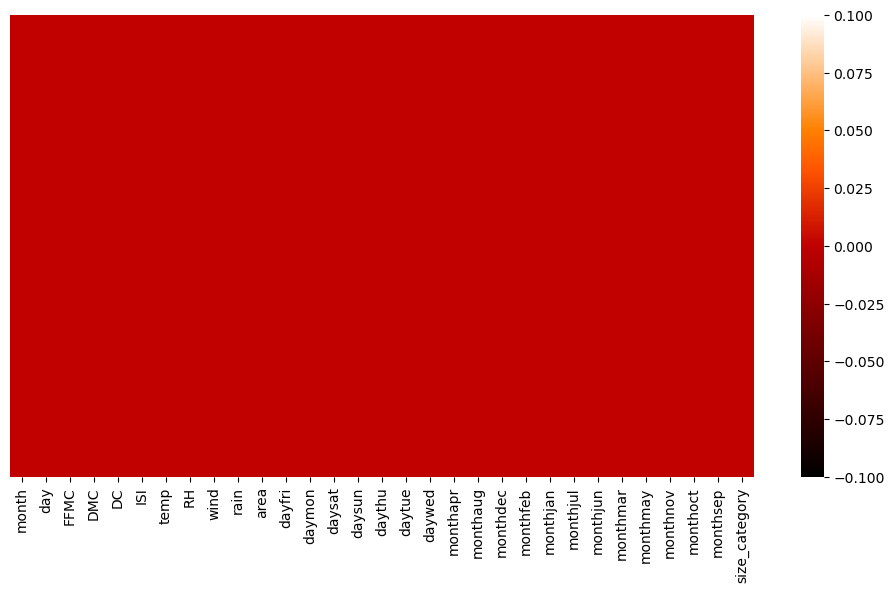

In [7]:
plt.rcParams['figure.figsize']=(12,6)
sns.heatmap(df.isna(), cmap =('gist_heat'), yticklabels=False)

<Axes: >

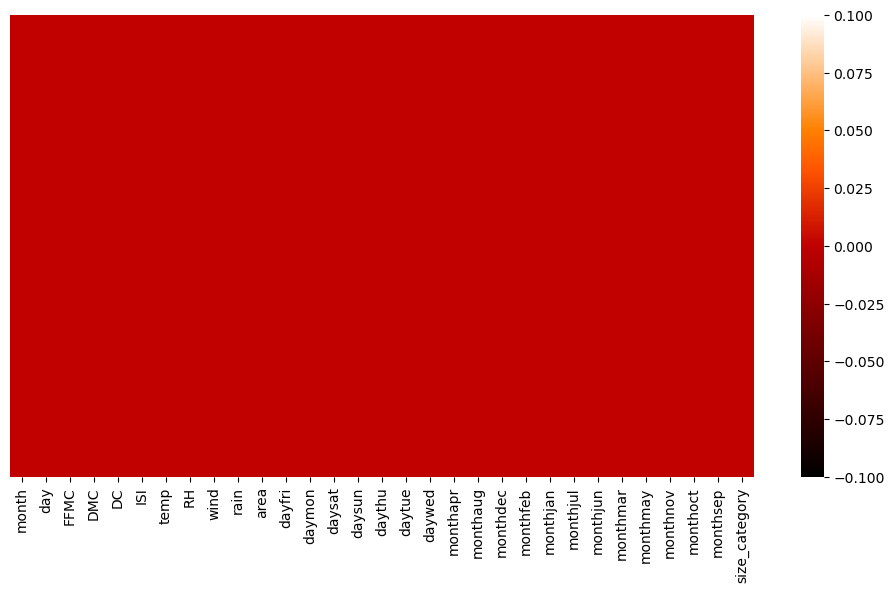

In [8]:
plt.rcParams['figure.figsize']=(12,6)
sns.heatmap(df.isna(), cmap =('gist_heat'), yticklabels=False)

In [9]:

df.dtypes
     

month             object
day               object
FFMC             float64
DMC              float64
DC               float64
ISI              float64
temp             float64
RH                 int64
wind             float64
rain             float64
area             float64
dayfri             int64
daymon             int64
daysat             int64
daysun             int64
daythu             int64
daytue             int64
daywed             int64
monthapr           int64
monthaug           int64
monthdec           int64
monthfeb           int64
monthjan           int64
monthjul           int64
monthjun           int64
monthmar           int64
monthmay           int64
monthnov           int64
monthoct           int64
monthsep           int64
size_category     object
dtype: object

In [10]:
#Target variable
y_count = df.size_category.value_counts().reset_index().rename(columns={'index':'size_category', 'size_category':'counts'})
     

size_category  counts
0         small     378
1         large     139

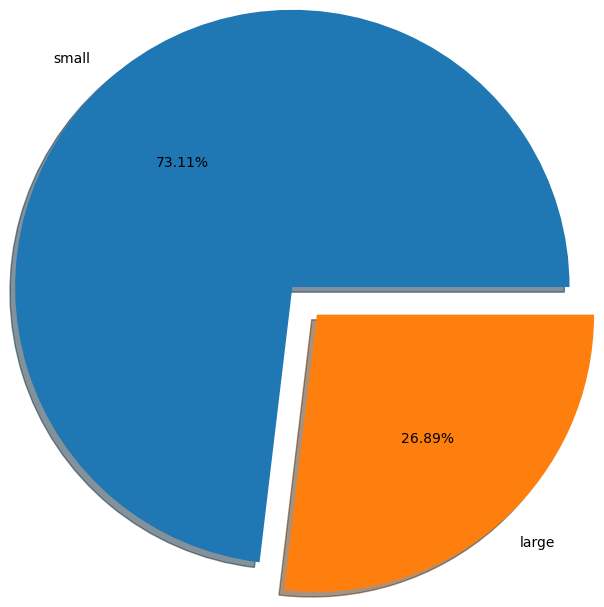

In [11]:
plt.pie(y_count.counts, labels=y_count['size_category'], shadow = True, autopct='%1.2f%%', explode=(0,0.2), radius=1.5)
y_count
     

In [12]:
#Other features with target variable
month_df = df.groupby(['size_category', 'month']).size().reset_index().rename(columns={0:'count'}).sort_values('count', ascending=False)
month_df.head(10)

size_category month  count
11         small   aug    141
21         small   sep    121
9          large   sep     51
1          large   aug     43
17         small   mar     42
15         small   jul     23
16         small   jun     14
13         small   feb     14
6          large   mar     12
20         small   oct     11

Text(0.5, 1.02, 'Num of fires in each month')

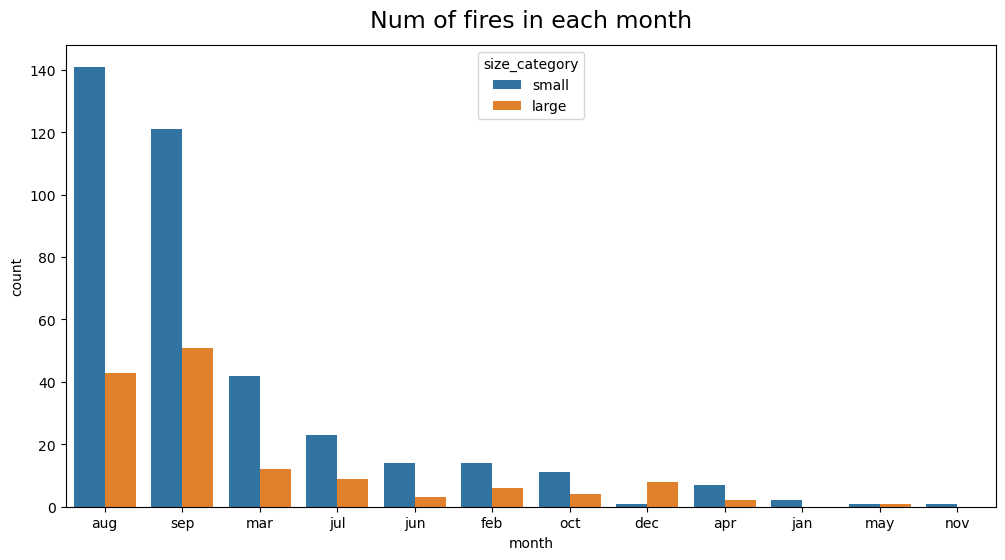

In [13]:

sns.barplot(x='month', y = 'count', hue='size_category', data=month_df)
plt.title("Num of fires in each month", fontsize=17, y=1.02)
     

In [14]:

day_df = df.groupby(['size_category', 'day']).size().reset_index().rename(columns={0:'count'}).sort_values('count', ascending=False)
day_df

size_category  day  count
10         small  sun     68
7          small  fri     64
9          small  sat     58
8          small  mon     55
11         small  thu     48
12         small  tue     44
13         small  wed     41
3          large  sun     27
2          large  sat     26
0          large  fri     21
5          large  tue     20
1          large  mon     19
4          large  thu     13
6          large  wed     13

Text(0.5, 1.02, 'Num of fires on each day')

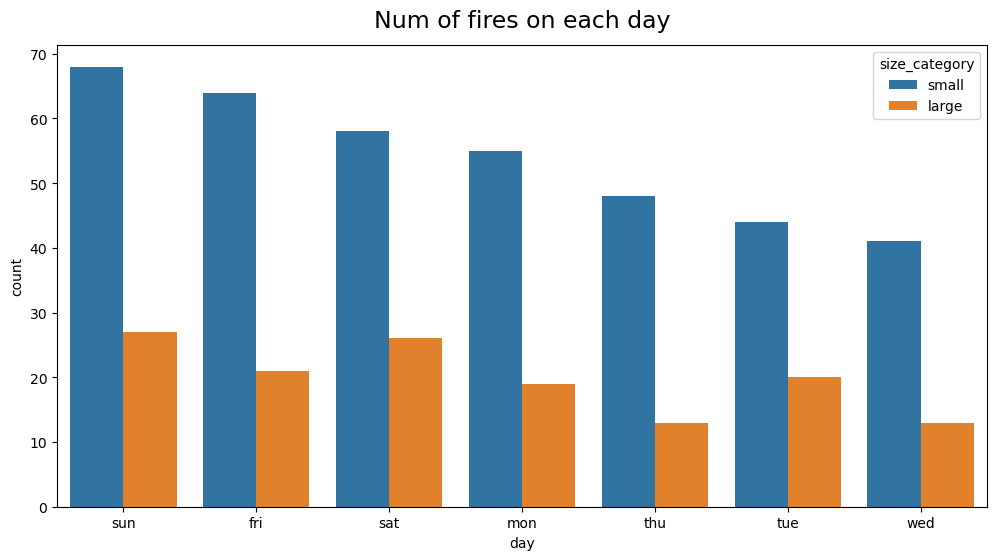

In [15]:

sns.barplot(x='day', y = 'count', hue='size_category', data=day_df)
plt.title("Num of fires on each day", fontsize=17, y=1.02)

In [16]:

labelencoder = LabelEncoder()
df.iloc[:, -1] = labelencoder.fit_transform(df.iloc[:,-1])
df['size_category']   

0      1
1      1
2      1
3      1
4      1
      ..
512    0
513    0
514    0
515    1
516    1
Name: size_category, Length: 517, dtype: int32

In [17]:

rain_df = df.groupby(['size_category', 'rain']).size().reset_index().rename(columns={0:'count'}).sort_values('count', ascending=False)
rain_df

size_category  rain  count
2              1   0.0    371
0              0   0.0    138
3              1   0.2      2
5              1   0.8      2
1              0   6.4      1
4              1   0.4      1
6              1   1.0      1
7              1   1.4      1

Text(0.5, 1.02, 'Rainfall level in diff category of forest')

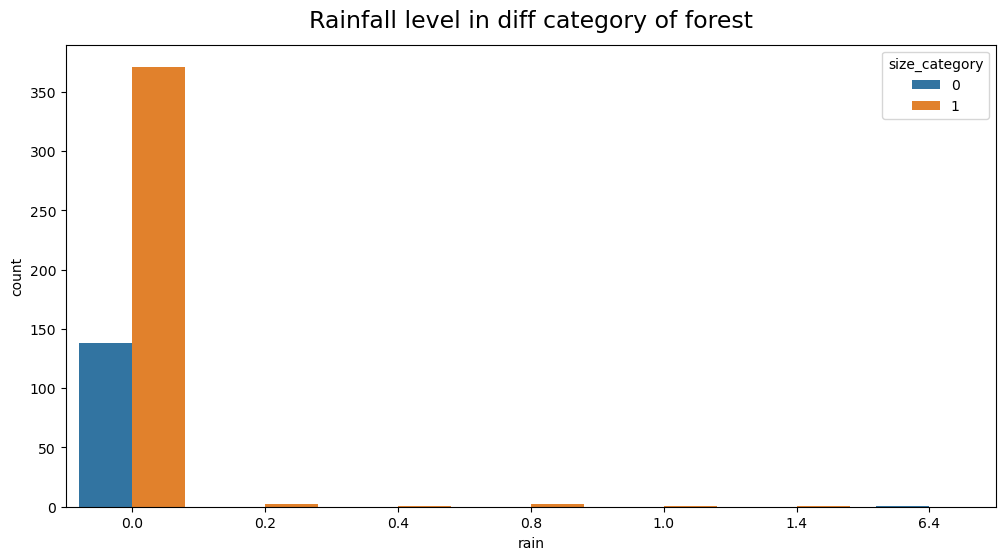

In [18]:

sns.barplot(x='rain', y='count', hue='size_category', data=rain_df)
plt.title("Rainfall level in diff category of forest", y=1.02, fontsize=17)

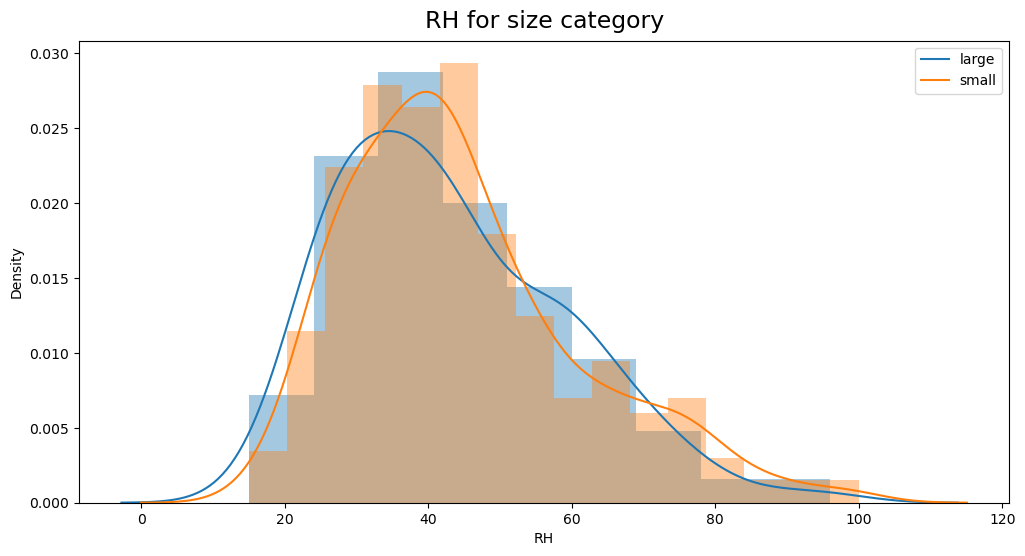

In [19]:

sns.distplot(df[df['size_category']==0]['RH'])
sns.distplot(df[df['size_category']==1]['RH'])                 #orange for small fire, blue for small fire
plt.title("RH for size category", y=1.01, fontsize=17)
legend_drawn_flag = True
plt.legend(["large", "small"], loc=0, frameon=legend_drawn_flag)
     

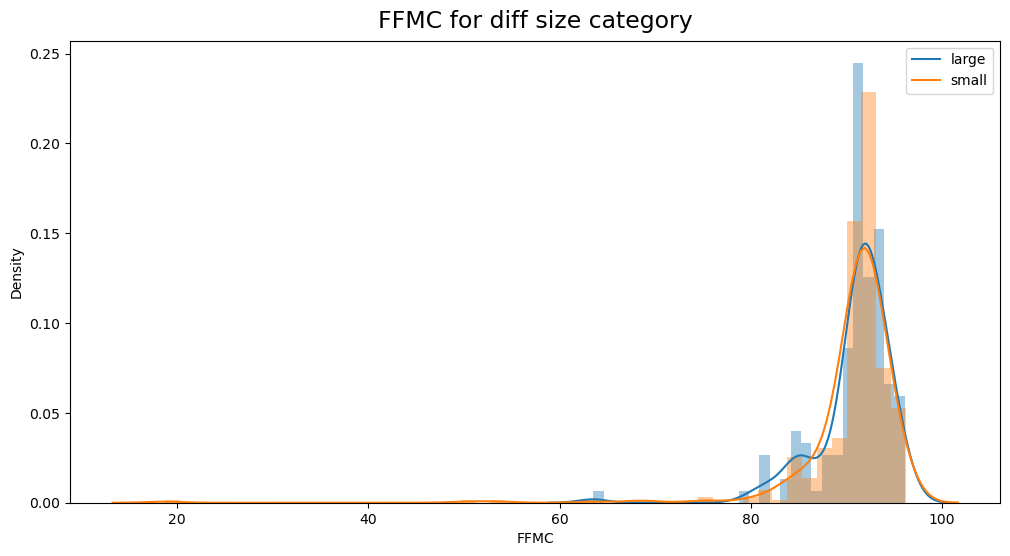

In [20]:

sns.distplot(df[df['size_category']==0]['FFMC'])
sns.distplot(df[df['size_category']==1]['FFMC'])                 #orange for small fire, blue for small fire
plt.title("FFMC for diff size category", y=1.01, fontsize=17)
legend_drawn_flag = True
plt.legend(["large", "small"], loc=0, frameon=legend_drawn_flag)

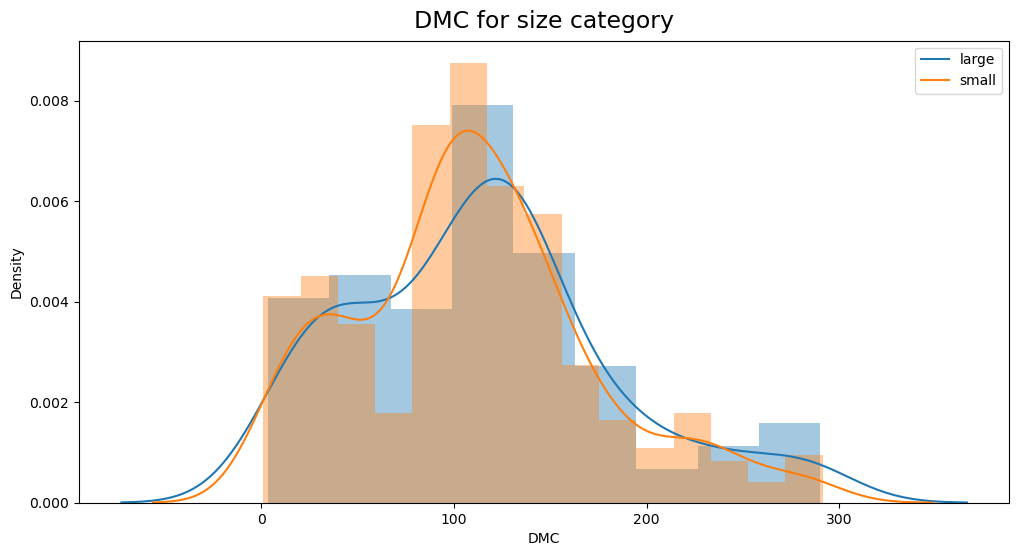

In [21]:
sns.distplot(df[df['size_category']==0]['DMC'])
sns.distplot(df[df['size_category']==1]['DMC'])                 #orange for small fire, blue for large fire
plt.title("DMC for size category", y=1.01, fontsize=17)
legend_drawn_flag = True
plt.legend(["large", "small"], loc=0, frameon=legend_drawn_flag)

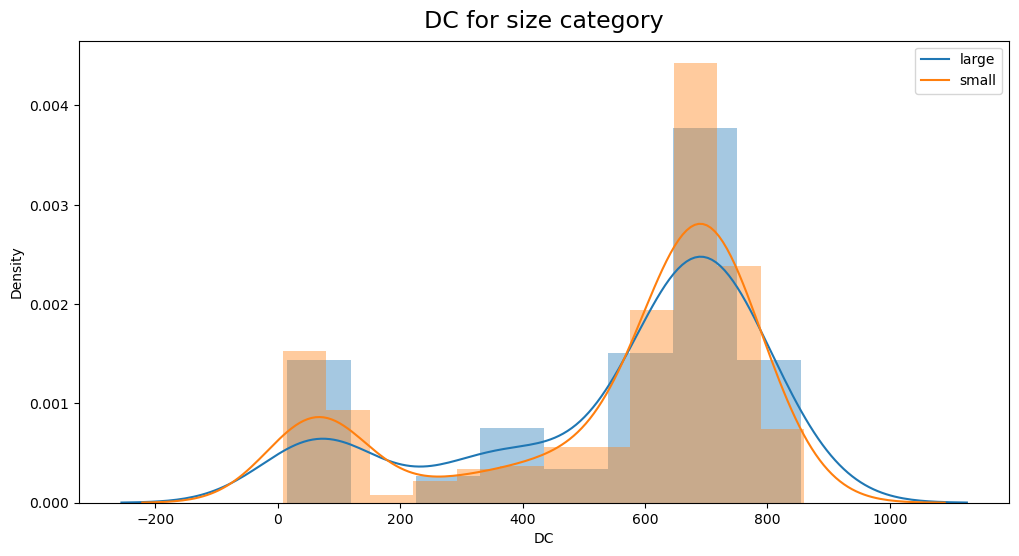

In [22]:
sns.distplot(df[df['size_category']==0]['DC'])
sns.distplot(df[df['size_category']==1]['DC'])                 #orange for small fire, blue for large fire
plt.title("DC for size category", y=1.01, fontsize=17)
legend_drawn_flag = True
plt.legend(["large", "small"], loc=0, frameon=legend_drawn_flag)

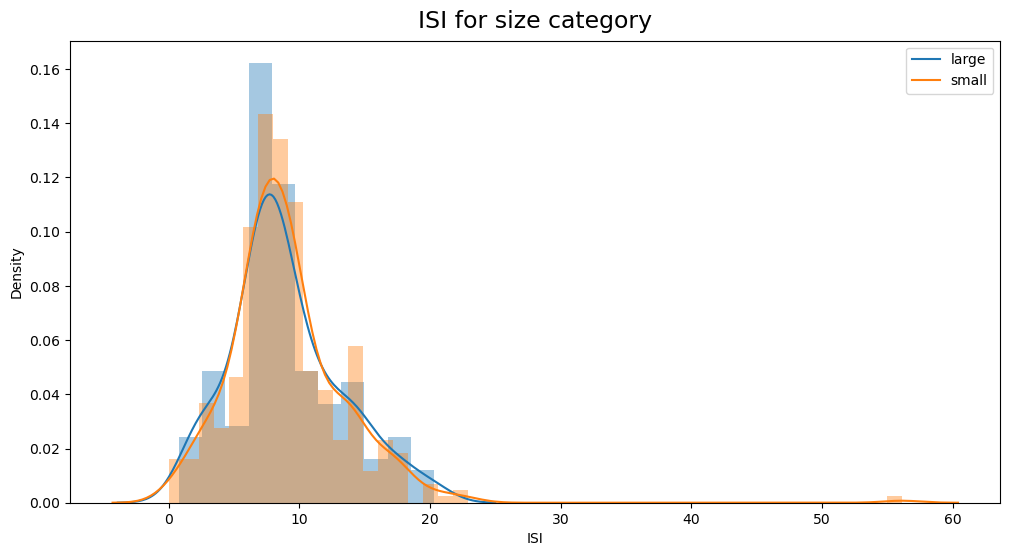

In [23]:

sns.distplot(df[df['size_category']==0]['ISI'])
sns.distplot(df[df['size_category']==1]['ISI'])                 #orange for small fire, blue for large fire
plt.title("ISI for size category", y=1.01, fontsize=17)
legend_drawn_flag = True
plt.legend(["large", "small"], loc=0, frameon=legend_drawn_flag)
     

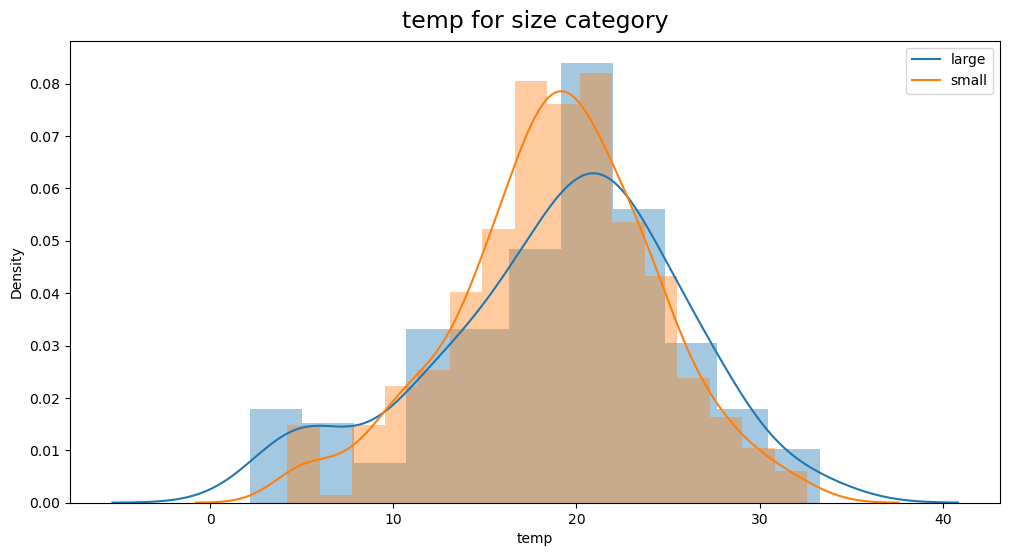

In [24]:

sns.distplot(df[df['size_category']==0]['temp'])
sns.distplot(df[df['size_category']==1]['temp'])                 #orange for small fire, blue for large fire
plt.title("temp for size category", y=1.01, fontsize=17)
legend_drawn_flag = True
plt.legend(["large", "small"], loc=0, frameon=legend_drawn_flag)

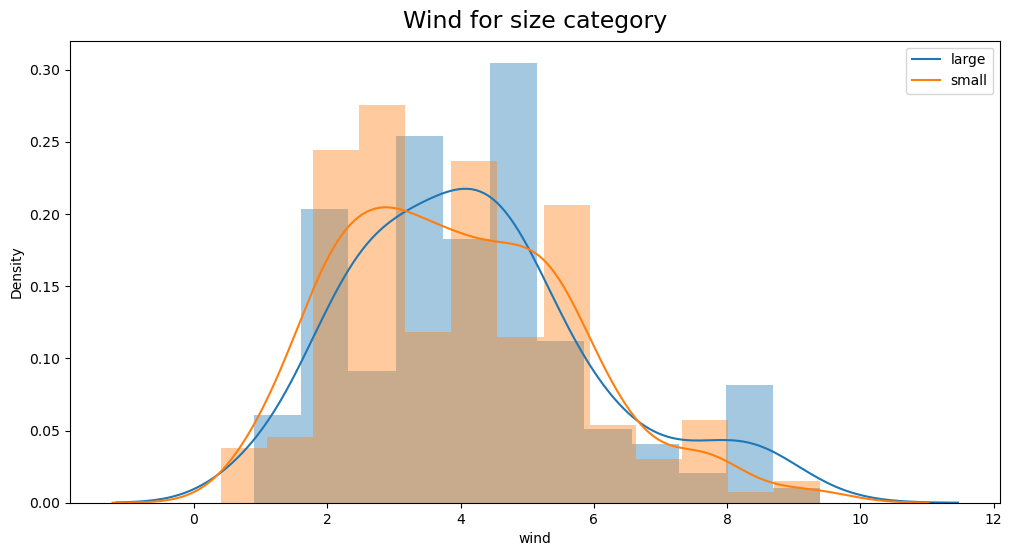

In [25]:

sns.distplot(df[df['size_category']==0]['wind'])
sns.distplot(df[df['size_category']==1]['wind'])                 #orange for small fire, blue for large fire
plt.title("Wind for size category", y=1.01, fontsize=17)
legend_drawn_flag = True
plt.legend(["large", "small"], loc=0, frameon=legend_drawn_flag)

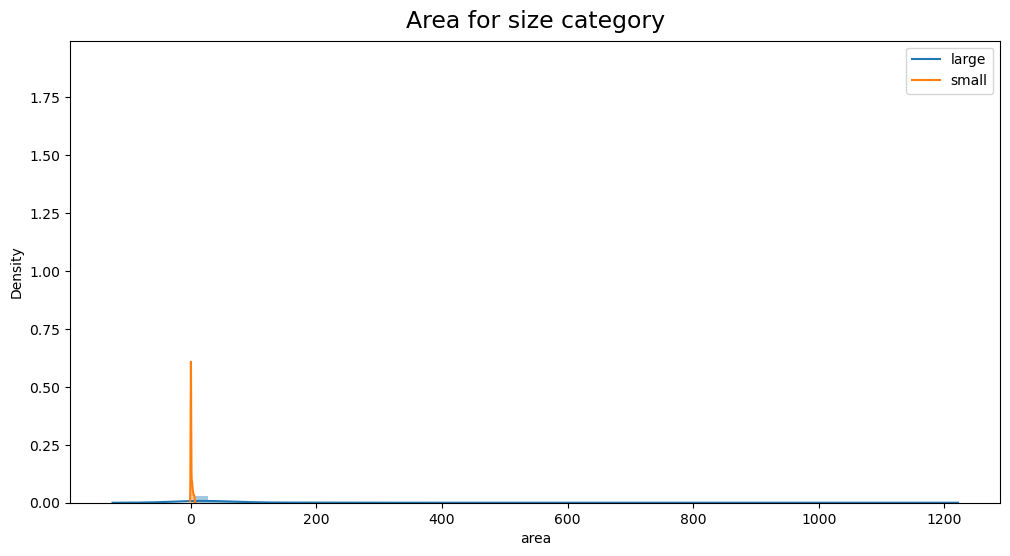

In [26]:
sns.distplot(df[df['size_category']==0]['area'])
sns.distplot(df[df['size_category']==1]['area'])                 #orange for small fire, blue for large fire
plt.title("Area for size category", y=1.01, fontsize=17)
legend_drawn_flag = True
plt.legend(["large", "small"], loc=0, frameon=legend_drawn_flag)
     

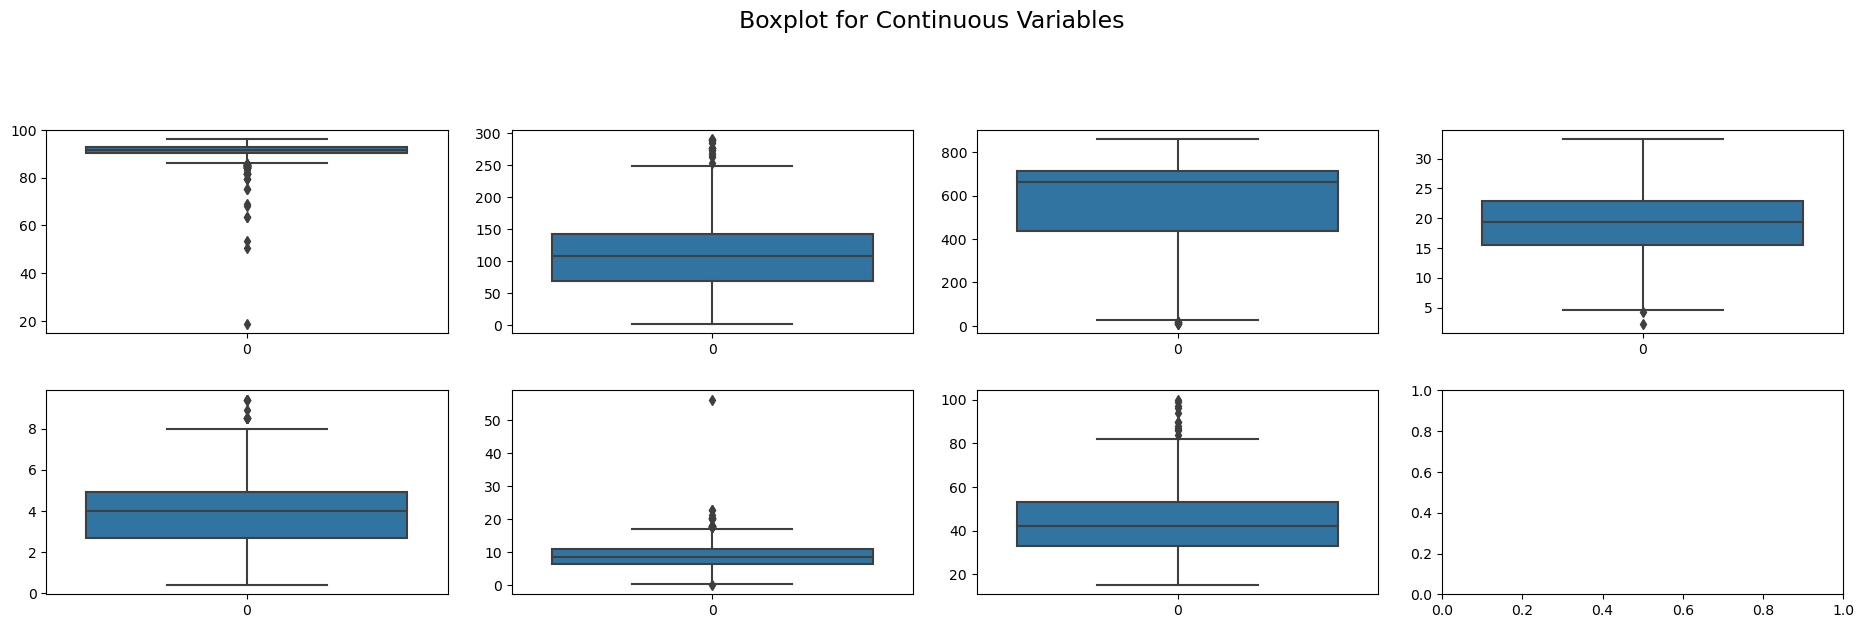

In [27]:

#check for outliers
fig, ax=plt.subplots(2,4, figsize=(19,6), sharex= False, sharey = False)
sns.boxplot(df.FFMC, ax=ax[0,0])
sns.boxplot(df.DMC, ax=ax[0,1])
sns.boxplot(df.DC, ax=ax[0,2])
sns.boxplot(df.temp, ax=ax[0,3])
sns.boxplot(df.wind, ax=ax[1,0])
sns.boxplot(df.ISI, ax=ax[1,1])
sns.boxplot(df.RH, ax=ax[1,2])
plt.suptitle("Boxplot for Continuous Variables", fontsize= 17, y = 1.06)
plt.tight_layout(pad=2.0)
     
    

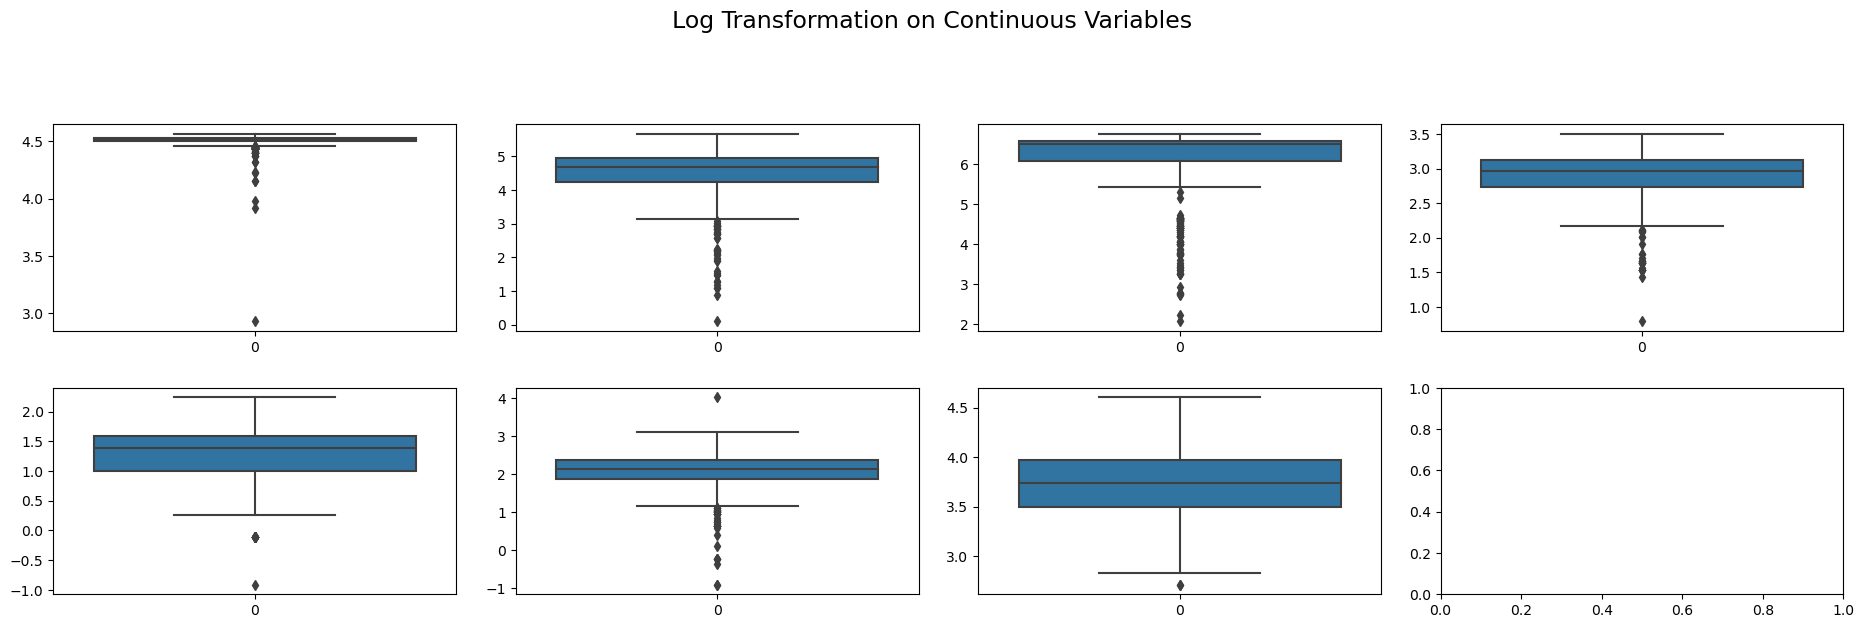

In [28]:


#Let ustry to treat our outliers by log tranformations
fig, ax=plt.subplots(2,4, figsize=(19,6), sharex= False, sharey = False)
sns.boxplot(np.log(df.FFMC), ax=ax[0,0])
sns.boxplot(np.log(df.DMC), ax=ax[0,1])
sns.boxplot(np.log(df.DC), ax=ax[0,2])
sns.boxplot(np.log(df.temp), ax=ax[0,3])
sns.boxplot(np.log(df.wind), ax=ax[1,0])
sns.boxplot(np.log(df.ISI), ax=ax[1,1])
sns.boxplot(np.log(df.RH), ax=ax[1,2])
plt.suptitle("Log Transformation on Continuous Variables", fontsize= 17, y = 1.06)
plt.tight_layout(pad=2.0)
     

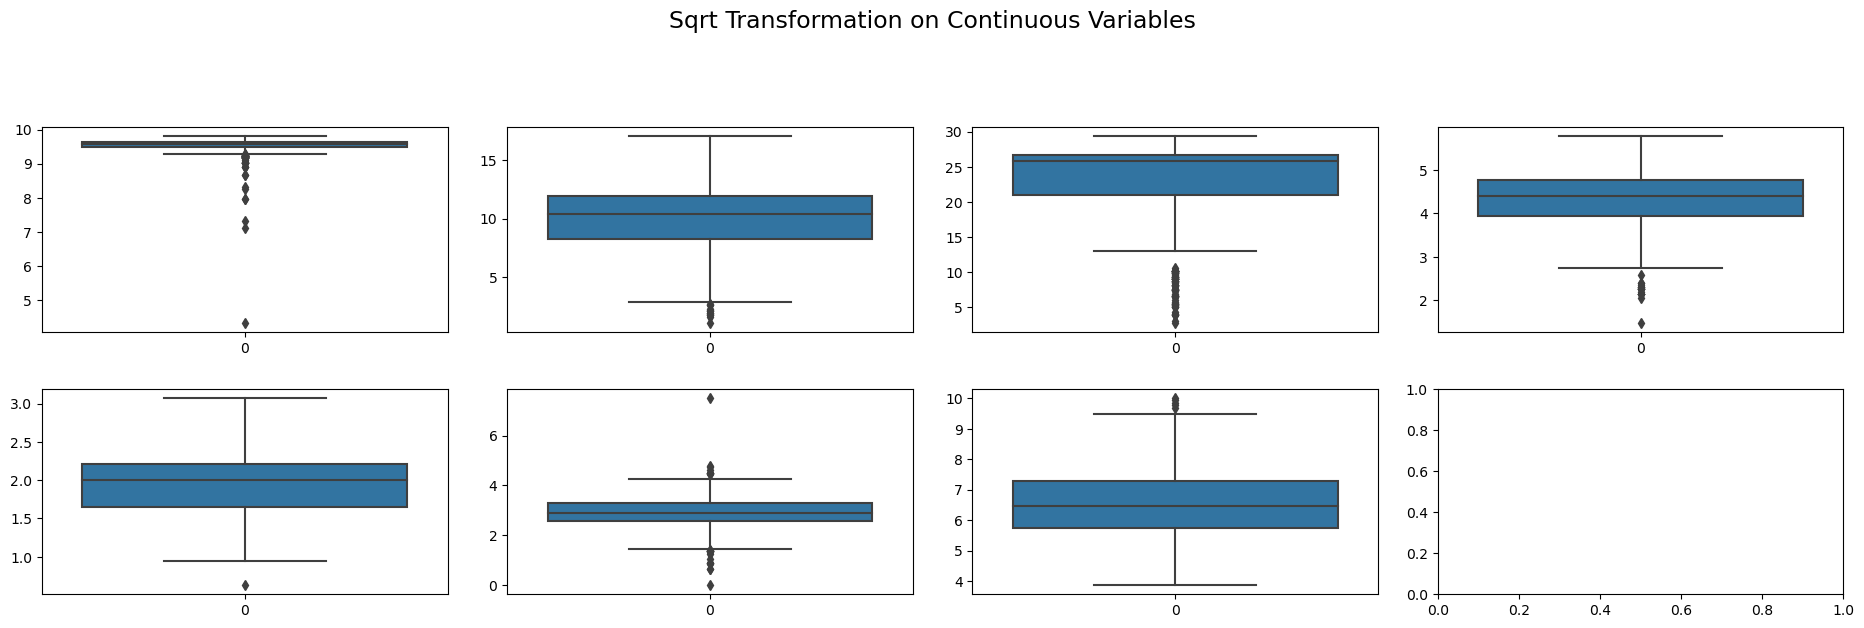

In [29]:

#Let ustry to treat our outliers by sqrt tranformations
fig, ax=plt.subplots(2,4, figsize=(19,6), sharex= False, sharey = False)
sns.boxplot(np.sqrt(df.FFMC), ax=ax[0,0])
sns.boxplot(np.sqrt(df.DMC), ax=ax[0,1])
sns.boxplot(np.sqrt(df.DC), ax=ax[0,2])
sns.boxplot(np.sqrt(df.temp), ax=ax[0,3])
sns.boxplot(np.sqrt(df.wind), ax=ax[1,0])
sns.boxplot(np.sqrt(df.ISI), ax=ax[1,1])
sns.boxplot(np.sqrt(df.RH), ax=ax[1,2])
plt.suptitle("Sqrt Transformation on Continuous Variables", fontsize= 17, y = 1.06)
plt.tight_layout(pad=2.0)

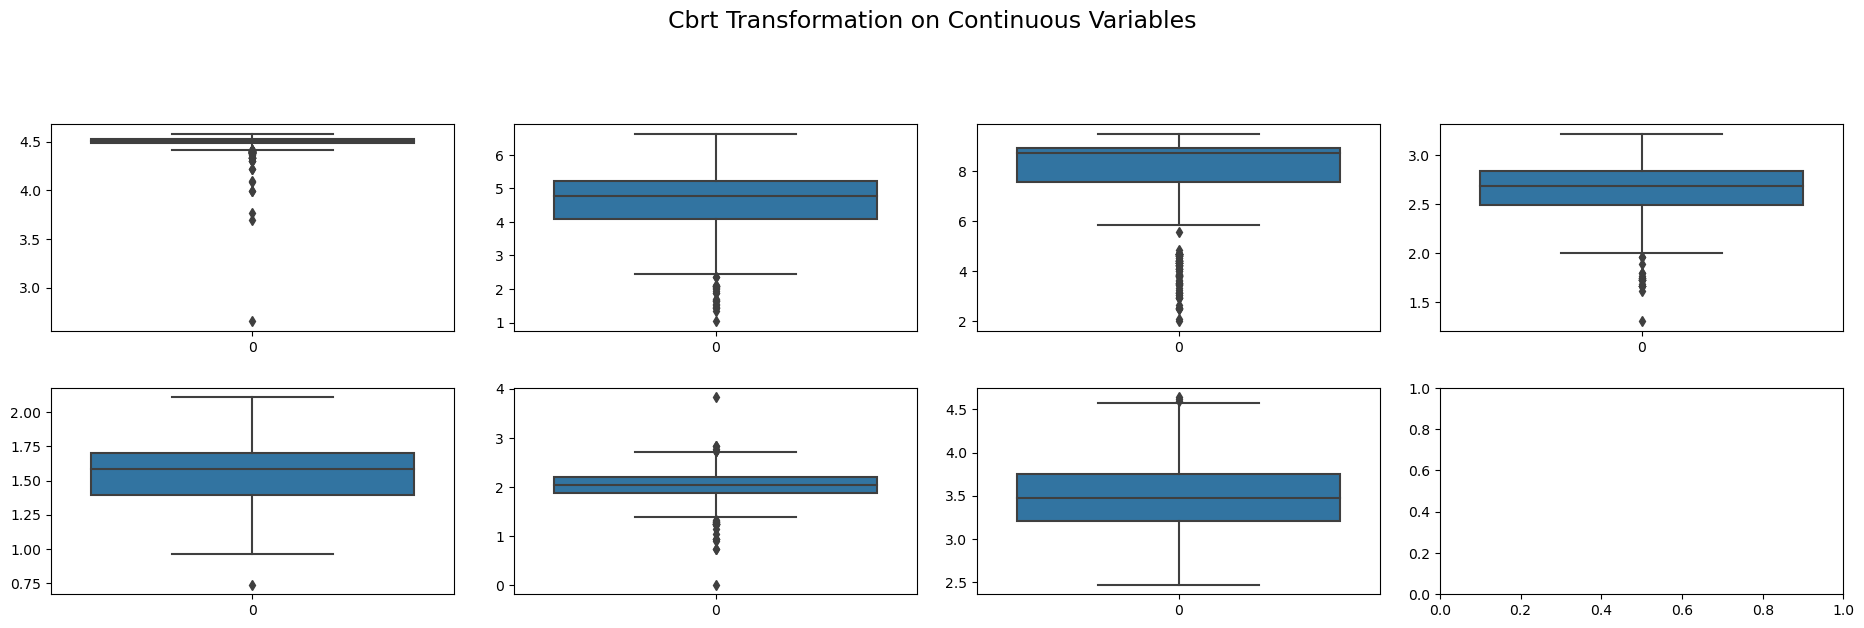

In [30]:

#Let ustry to treat our outliers by cbrt tranformations
fig, ax=plt.subplots(2,4, figsize=(19,6), sharex= False, sharey = False)
sns.boxplot(np.cbrt(df.FFMC), ax=ax[0,0])
sns.boxplot(np.cbrt(df.DMC), ax=ax[0,1])
sns.boxplot(np.cbrt(df.DC), ax=ax[0,2])
sns.boxplot(np.cbrt(df.temp), ax=ax[0,3])
sns.boxplot(np.cbrt(df.wind), ax=ax[1,0])
sns.boxplot(np.cbrt(df.ISI), ax=ax[1,1])
sns.boxplot(np.cbrt(df.RH), ax=ax[1,2])
plt.suptitle("Cbrt Transformation on Continuous Variables", fontsize= 17, y = 1.06)
plt.tight_layout(pad=2.0)
     

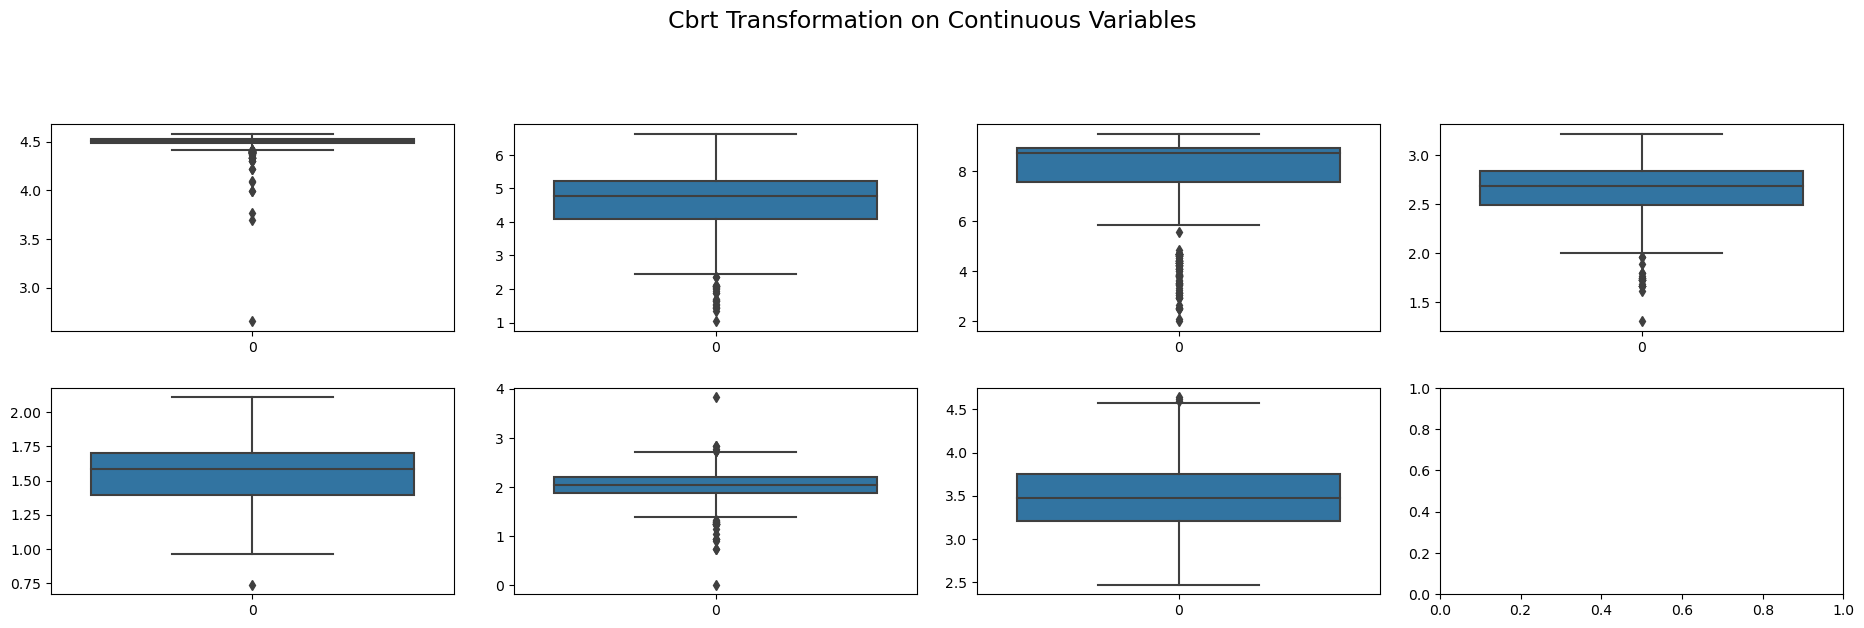

In [31]:

#Let ustry to treat our outliers by cbrt tranformations
fig, ax=plt.subplots(2,4, figsize=(19,6), sharex= False, sharey = False)
sns.boxplot(np.cbrt(df.FFMC), ax=ax[0,0])
sns.boxplot(np.cbrt(df.DMC), ax=ax[0,1])
sns.boxplot(np.cbrt(df.DC), ax=ax[0,2])
sns.boxplot(np.cbrt(df.temp), ax=ax[0,3])
sns.boxplot(np.cbrt(df.wind), ax=ax[1,0])
sns.boxplot(np.cbrt(df.ISI), ax=ax[1,1])
sns.boxplot(np.cbrt(df.RH), ax=ax[1,2])
plt.suptitle("Cbrt Transformation on Continuous Variables", fontsize= 17, y = 1.06)
plt.tight_layout(pad=2.0)
     

In [32]:

df.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

In [33]:

#to get correlation of target variable with numerical columns
df1 = df.drop(['month','day','dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep'], axis=1)
df1.head()
     

FFMC   DMC     DC  ISI  temp  RH  wind  rain  area  size_category
0  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0              1
1  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0              1
2  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0              1
3  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0              1
4  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0              1

In [34]:

corr = pd.DataFrame(data = df1.corr().iloc[:,-1], index=df1.columns)
corr

size_category
FFMC               -0.022063
DMC                -0.034715
DC                 -0.019428
ISI                 0.008726
temp               -0.006021
RH                  0.045243
wind               -0.059113
rain               -0.050001
area               -0.311322
size_category       1.000000

Text(0.5, 1.01, 'Correlation plot of Target variable with other continuous features')

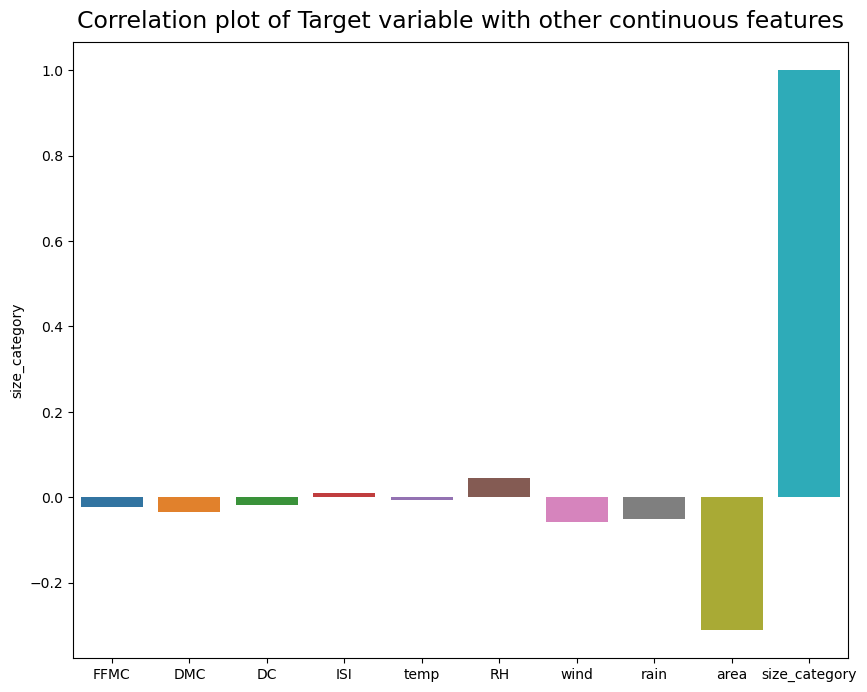

In [35]:
fig , ax=plt.subplots(figsize=(10,8))
sns.barplot(x = corr.index, y = corr.iloc[:,0])
plt.title('Correlation plot of Target variable with other continuous features', fontsize=17, y =1.01)
     

Text(0.5, 1.0, 'Correlation Map of Numerical variables')

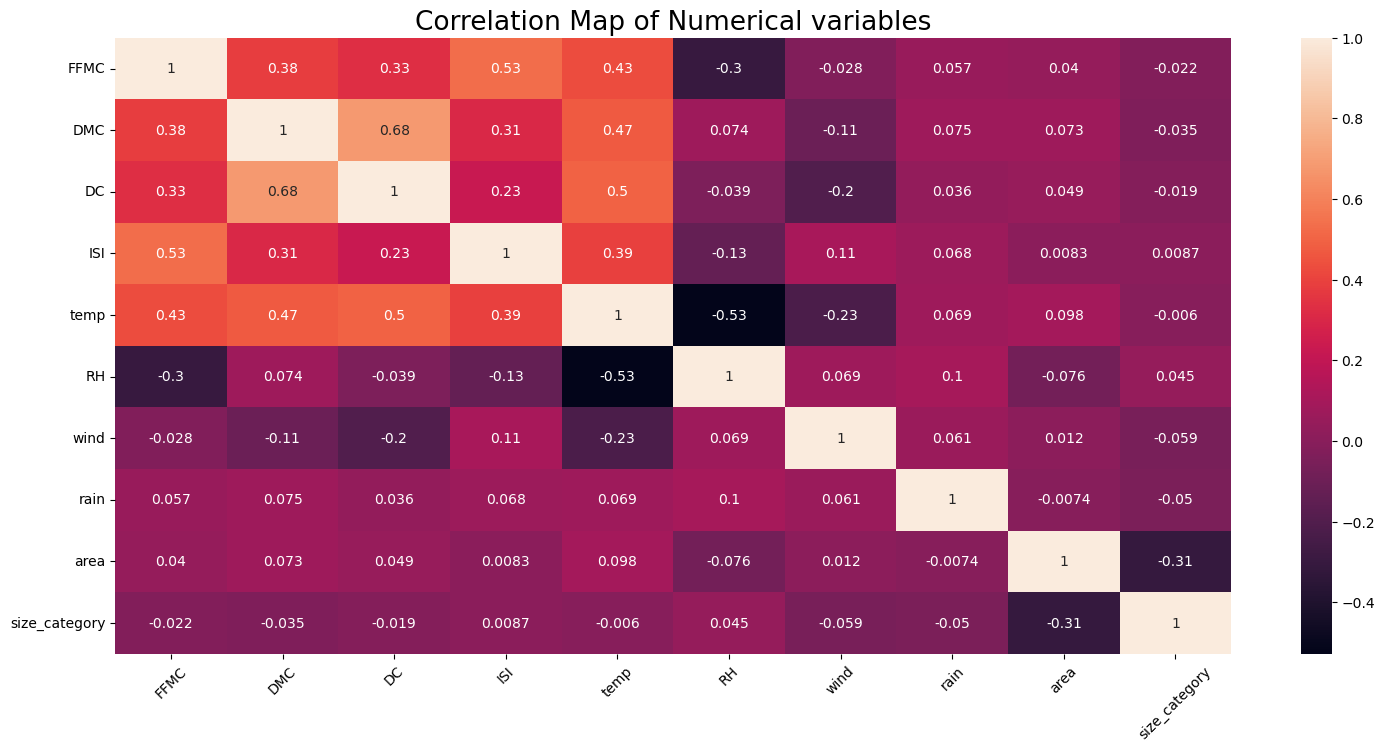

In [36]:


fig= plt.figure(figsize=(18, 8))
sns.heatmap(df1.corr(), annot=True);
plt.xticks(rotation=45)
plt.title("Correlation Map of Numerical variables", fontsize=19)

Text(0.5, 1.01, 'Pairplot for all numerical variables')

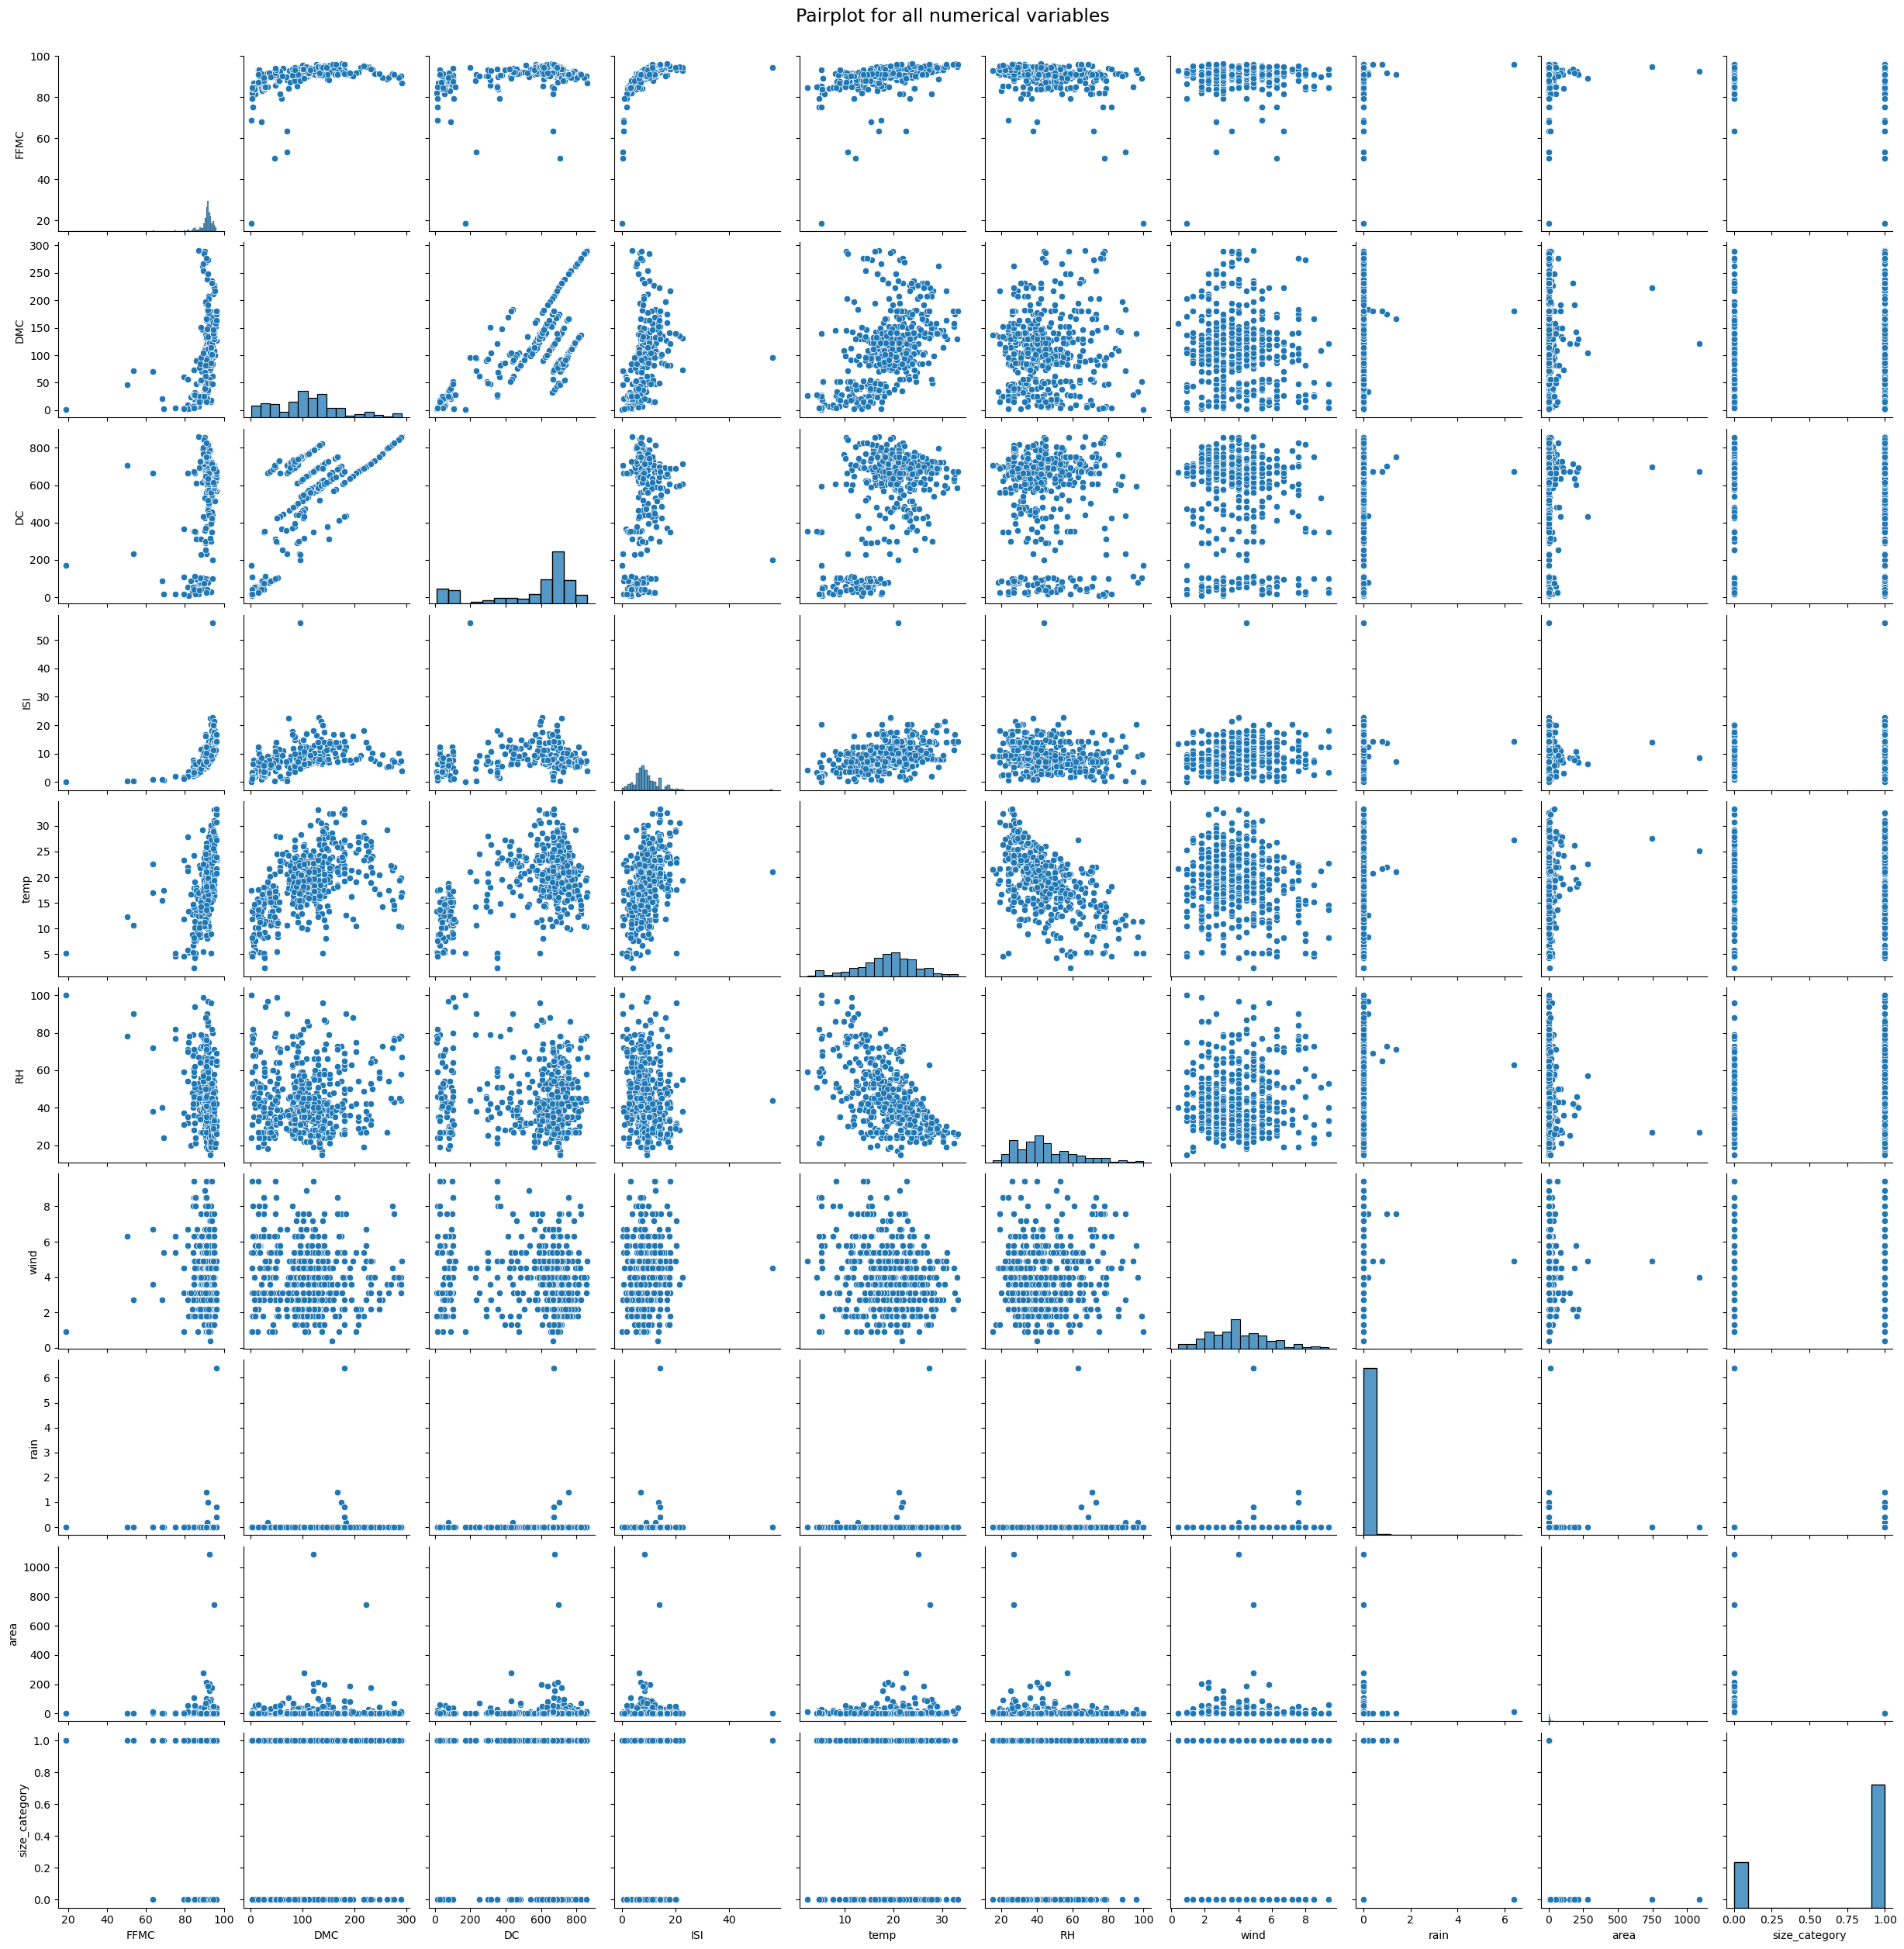

In [37]:

sns.pairplot(df1)
plt.suptitle("Pairplot for all numerical variables", y = 1.01, fontsize=17)

In [38]:

#drop the unnecessary columns
df.drop(['month', 'day', 'monthjan', 'daymon'], axis=1, inplace=True)

In [39]:

pd.set_option("display.max_columns", 27)
df.head()
     


FFMC   DMC     DC  ISI  temp  RH  wind  rain  area  dayfri  daysat  daysun  \
0  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0       1       0       0   
1  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0       0       0       0   
2  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0       0       1       0   
3  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0       1       0       0   
4  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0       0       0       1   

   daythu  daytue  daywed  monthapr  monthaug  monthdec  monthfeb  monthjul  \
0       0       0       0         0         0         0         0         0   
1       0       1       0         0         0         0         0         0   
2       0       0       0         0         0         0         0         0   
3       0       0       0         0         0         0         0         0   
4       0       0       0         0         0         0         0         0   

   monthjun  monthmar  monthmay  monthnov  monthoct  monthsep  size_category  
0         0         1         0         0         0         0              1  
1         0         0         0         0         1         0              1  
2         0         0         0         0         1         0              1  
3         0         1         0         0         0         0              1  
4         0         1         0         0         0         0              1

In [40]:

#check for outliers
from sklearn.ensemble import IsolationForest
data1=df.copy()

#training the model
clf = IsolationForest(random_state=10, contamination=.01)
clf.fit(data1)
data1['anamoly'] = clf.predict(data1.iloc[:,0:27])
outliers = data1[data1['anamoly']==-1]
     

In [41]:
outliers
     

FFMC   DMC     DC   ISI  temp   RH  wind  rain   area  dayfri  daysat  \
281  85.4  25.4  349.7   2.6   5.1   24   8.5   0.0  24.77       0       0   
299  53.4  71.0  233.8   0.4  10.6   90   2.7   0.0   0.00       0       1   
379  18.7   1.1  171.4   0.0   5.2  100   0.9   0.0   0.00       0       0   
463  75.1   4.4   16.2   1.9   4.6   82   6.3   0.0   5.39       0       0   
464  75.1   4.4   16.2   1.9   5.1   77   5.4   0.0   2.14       0       0   
469  91.0  14.6   25.6  12.3  13.7   33   9.4   0.0  61.13       0       0   

     daysun  daythu  ...  monthapr  monthaug  monthdec  monthfeb  monthjul  \
281       0       0  ...         0         0         1         0         0   
299       0       0  ...         0         0         0         0         0   
379       1       0  ...         0         0         0         0         0   
463       0       0  ...         0         0         0         1         0   
464       0       0  ...         0         0         0         1         0   
469       1       0  ...         1         0         0         0         0   

     monthjun  monthmar  monthmay  monthnov  monthoct  monthsep  \
281         0         0         0         0         0         0   
299         1         0         0         0         0         0   
379         0         0         0         0         0         0   
463         0         0         0         0         0         0   
464         0         0         0         0         0         0   
469         0         0         0         0         0         0   

     size_category  anamoly  
281              0       -1  
299              1       -1  
379              1       -1  
463              1       -1  
464              1       -1  
469              0       -1  

[6 rows x 28 columns]

In [42]:

outliers.index

Int64Index([281, 299, 379, 463, 464, 469], dtype='int64')

In [43]:

df.shape

(517, 27)

In [44]:

x = df.drop('size_category', axis=1)
y = df['size_category']

In [45]:
#Standardize & Normalize the data
norm = MinMaxScaler()
std = StandardScaler()

x_norm = pd.DataFrame(norm.fit_transform(x), columns=x.columns)            #data between -3 to +3
x_std = pd.DataFrame(std.fit_transform(x), columns=x.columns)            #data between -1 to +1

In [46]:

x_std.head()
     

FFMC       DMC        DC       ISI      temp        RH      wind  \
0 -0.805959 -1.323326 -1.830477 -0.860946 -1.842640  0.411724  1.498614   
1 -0.008102 -1.179541  0.488891 -0.509688 -0.153278 -0.692456 -1.741756   
2 -0.008102 -1.049822  0.560715 -0.509688 -0.739383 -0.692456 -1.518282   
3  0.191362 -1.212361 -1.898266 -0.004756 -1.825402  3.233519 -0.009834   
4 -0.243833 -0.931043 -1.798600  0.126966 -1.291012  3.356206 -1.238940   

       rain     area    dayfri    daysat    daysun    daythu    daytue  \
0 -0.073268 -0.20202  2.254407 -0.440449 -0.474467 -0.365748 -0.375873   
1 -0.073268 -0.20202 -0.443576 -0.440449 -0.474467 -0.365748  2.660475   
2 -0.073268 -0.20202 -0.443576  2.270410 -0.474467 -0.365748 -0.375873   
3  0.603155 -0.20202  2.254407 -0.440449 -0.474467 -0.365748 -0.375873   
4 -0.073268 -0.20202 -0.443576 -0.440449  2.107630 -0.365748 -0.375873   

     daywed  monthapr  monthaug  monthdec  monthfeb  monthjul  monthjun  \
0 -0.341512 -0.133103 -0.743339 -0.133103 -0.200603 -0.256865 -0.184391   
1 -0.341512 -0.133103 -0.743339 -0.133103 -0.200603 -0.256865 -0.184391   
2 -0.341512 -0.133103 -0.743339 -0.133103 -0.200603 -0.256865 -0.184391   
3 -0.341512 -0.133103 -0.743339 -0.133103 -0.200603 -0.256865 -0.184391   
4 -0.341512 -0.133103 -0.743339 -0.133103 -0.200603 -0.256865 -0.184391   

   monthmar  monthmay  monthnov  monthoct  monthsep  
0  2.928152 -0.062318 -0.044023 -0.172860 -0.706081  
1 -0.341512 -0.062318 -0.044023  5.785038 -0.706081  
2 -0.341512 -0.062318 -0.044023  5.785038 -0.706081  
3  2.928152 -0.062318 -0.044023 -0.172860 -0.706081  
4  2.928152 -0.062318 -0.044023 -0.172860 -0.706081

In [47]:

x_train, x_test, y_train, y_test = train_test_split(x_std, y, test_size=0.25)
     

In [48]:

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((387, 26), (130, 26), (387,), (130,))

 ## The dataset contains 36733 instances of 11 sensor measures aggregated over one hour (by means of average or sum) from a gas turbine. 
The Dataset includes gas turbine parameters (such as Turbine Inlet Temperature and Compressor Discharge pressure) in addition to the ambient variables.



Problem statement: predicting turbine energy yield (TEY) using ambient variables as features.



Attribute Information:

The explanations of sensor measurements and their brief statistics are given below.

Variable (Abbr.) Unit Min Max Mean
Ambient temperature (AT) C â€“6.23 37.10 17.71
Ambient pressure (AP) mbar 985.85 1036.56 1013.07
Ambient humidity (AH) (%) 24.08 100.20 77.87
Air filter difference pressure (AFDP) mbar 2.09 7.61 3.93
Gas turbine exhaust pressure (GTEP) mbar 17.70 40.72 25.56
Turbine inlet temperature (TIT) C 1000.85 1100.89 1081.43
Turbine after temperature (TAT) C 511.04 550.61 546.16
Compressor discharge pressure (CDP) mbar 9.85 15.16 12.06
Turbine energy yield (TEY) MWH 100.02 179.50 133.51
Carbon monoxide (CO) mg/m3 0.00 44.10 2.37
Nitrogen oxides (NOx) mg/m3 25.90 119.91 65.29

In [5]:
import pandas as pd
import numpy as npd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings(action='ignore')
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split


#Load data
df = pd.read_csv('gas_turbines.csv')
df.head()
     

AT      AP      AH    AFDP    GTEP     TIT     TAT     TEY     CDP  \
0  6.8594  1007.9  96.799  3.5000  19.663  1059.2  550.00  114.70  10.605   
1  6.7850  1008.4  97.118  3.4998  19.728  1059.3  550.00  114.72  10.598   
2  6.8977  1008.8  95.939  3.4824  19.779  1059.4  549.87  114.71  10.601   
3  7.0569  1009.2  95.249  3.4805  19.792  1059.6  549.99  114.72  10.606   
4  7.3978  1009.7  95.150  3.4976  19.765  1059.7  549.98  114.72  10.612   

       CO     NOX  
0  3.1547  82.722  
1  3.2363  82.776  
2  3.2012  82.468  
3  3.1923  82.670  
4  3.2484  82.311

In [6]:

df.shape

(15039, 11)

In [7]:

df.columns

Index(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO',
       'NOX'],
      dtype='object')

In [8]:

df.info()
     

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [9]:

df.describe().T

count         mean        std          min          25%        50%  \
AT    15039.0    17.764381   7.574323     0.522300    11.408000    18.1860   
AP    15039.0  1013.199240   6.410760   985.850000  1008.900000  1012.8000   
AH    15039.0    79.124174  13.793439    30.344000    69.750000    82.2660   
AFDP  15039.0     4.200294   0.760197     2.087400     3.723900     4.1862   
GTEP  15039.0    25.419061   4.173916    17.878000    23.294000    25.0820   
TIT   15039.0  1083.798770  16.527806  1000.800000  1079.600000  1088.7000   
TAT   15039.0   545.396183   7.866803   512.450000   542.170000   549.8900   
TEY   15039.0   134.188464  15.829717   100.170000   127.985000   133.7800   
CDP   15039.0    12.102353   1.103196     9.904400    11.622000    12.0250   
CO    15039.0     1.972499   2.222206     0.000388     0.858055     1.3902   
NOX   15039.0    68.190934  10.470586    27.765000    61.303500    66.6010   

            75%        max  
AT      23.8625    34.9290  
AP    1016.9000  1034.2000  
AH      90.0435   100.2000  
AFDP     4.5509     7.6106  
GTEP    27.1840    37.4020  
TIT   1096.0000  1100.8000  
TAT    550.0600   550.6100  
TEY    140.8950   174.6100  
CDP     12.5780    15.0810  
CO       2.1604    44.1030  
NOX     73.9355   119.8900

In [10]:

#check for misssing values
df.isna().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [11]:

df.isna().any()

AT      False
AP      False
AH      False
AFDP    False
GTEP    False
TIT     False
TAT     False
TEY     False
CDP     False
CO      False
NOX     False
dtype: bool

<Axes: >

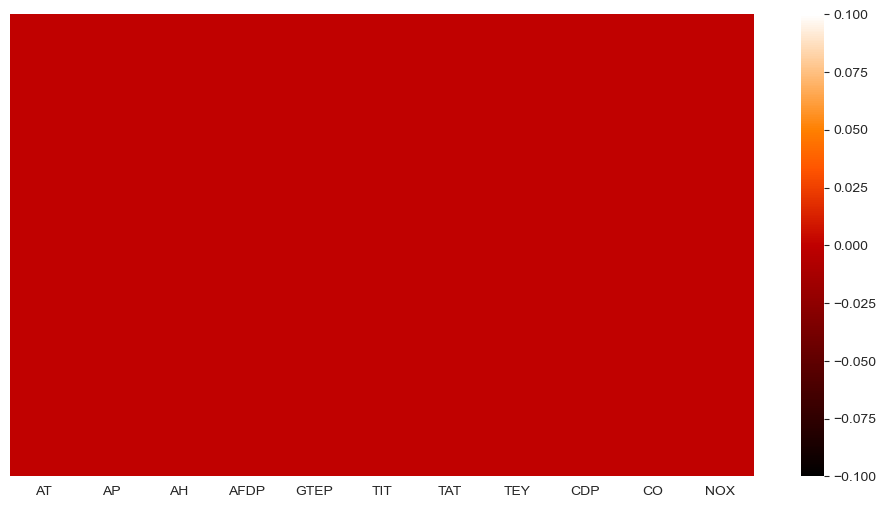

In [12]:
plt.rcParams['figure.figsize']=(12,6)
sns.heatmap(df.isna(), cmap =('gist_heat'), yticklabels=False)


In [13]:

#check for duplicate values
df[df.duplicated()].shape
     

(0, 11)

In [14]:

df[df.duplicated()]

Empty DataFrame
Columns: [AT, AP, AH, AFDP, GTEP, TIT, TAT, TEY, CDP, CO, NOX]
Index: []

In [15]:
df.nunique()


AT      12086
AP        540
AH      12637
AFDP    11314
GTEP     8234
TIT       706
TAT      2340
TEY      4207
CDP      3611
CO      13096
NOX     11996
dtype: int64

<Axes: title={'center': 'Distplot for TEY'}, xlabel='TEY', ylabel='Density'>

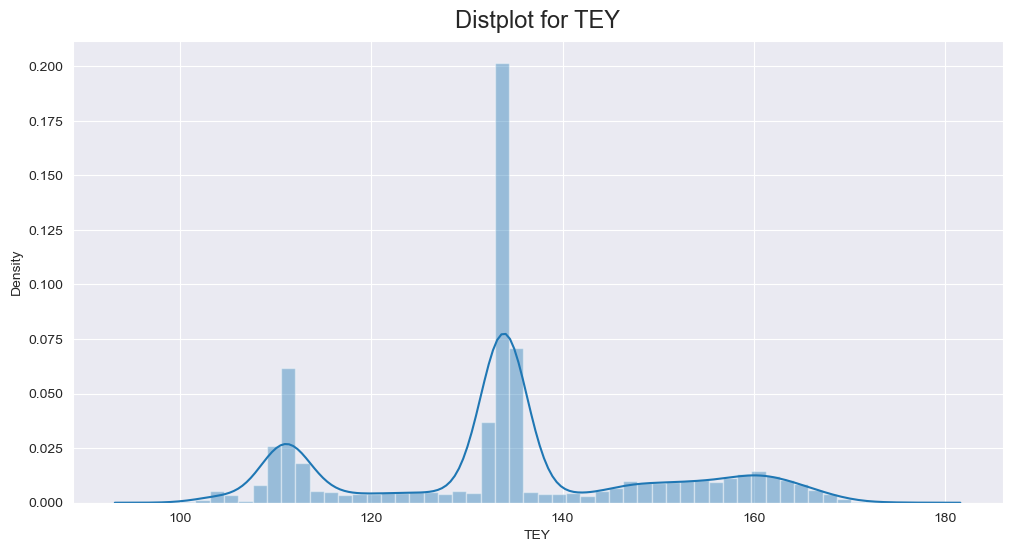

In [16]:

#Target variable
plt.title('Distplot for TEY', fontsize=17, y = 1.01)
sns.distplot(df['TEY'])
     

<Axes: title={'center': 'Distplot for AT'}, xlabel='AT', ylabel='Density'>

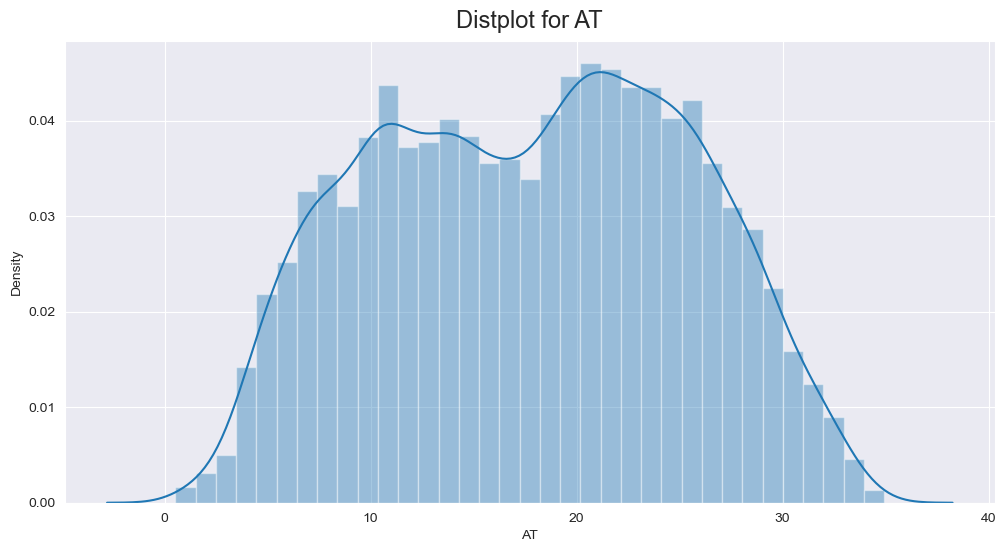

In [17]:

plt.title('Distplot for AT', fontsize=17, y = 1.01)
sns.distplot(df['AT'])

<Axes: title={'center': 'Distplot for AP'}, xlabel='AP', ylabel='Density'>

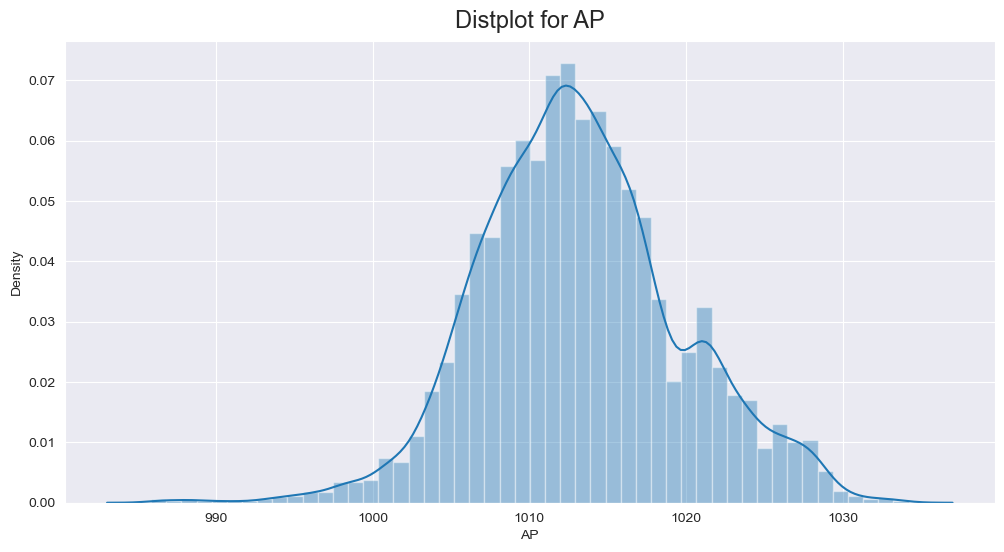

In [18]:

plt.title('Distplot for AP', fontsize=17, y = 1.01)
sns.distplot(df['AP'])

<Axes: title={'center': 'Distplot for AH'}, xlabel='AH', ylabel='Density'>

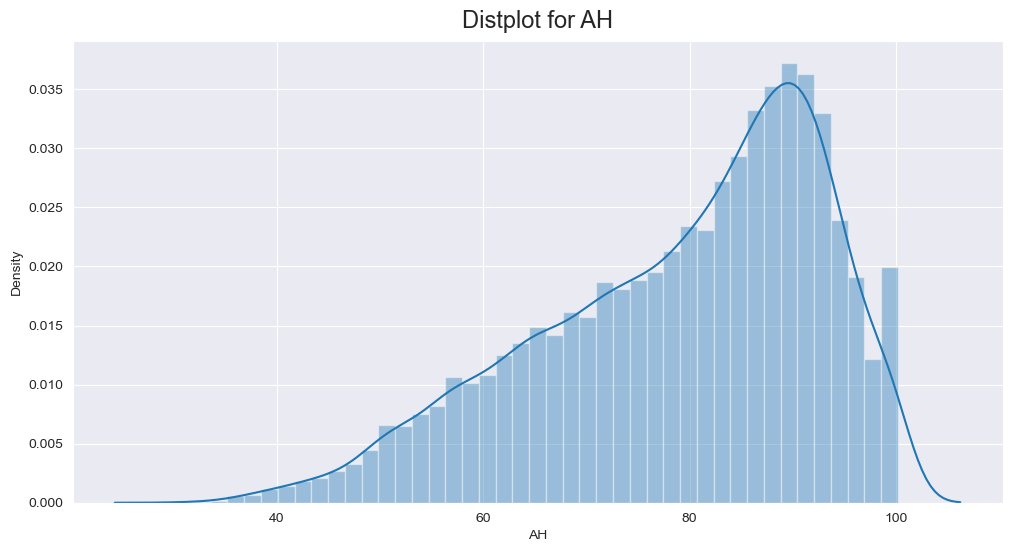

In [19]:

plt.title('Distplot for AH', fontsize=17, y = 1.01)
sns.distplot(df['AH'])

<Axes: title={'center': 'Distplot for AFDP'}, xlabel='AFDP', ylabel='Density'>

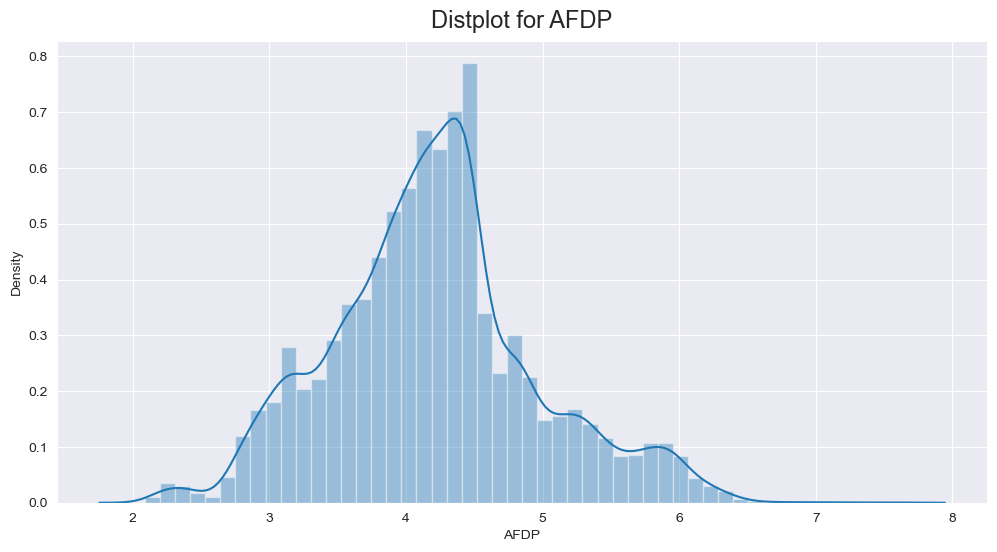

In [20]:

plt.title('Distplot for AFDP', fontsize=17, y = 1.01)
sns.distplot(df['AFDP'])

<Axes: title={'center': 'Distplot for GTEP'}, xlabel='GTEP', ylabel='Density'>

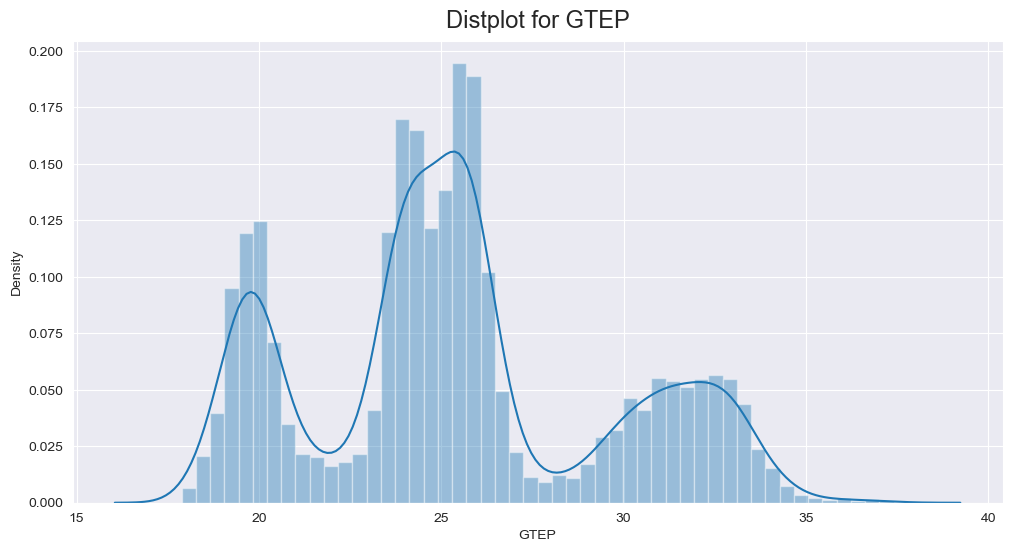

In [21]:
plt.title('Distplot for GTEP', fontsize=17, y = 1.01)
sns.distplot(df['GTEP'])



<Axes: title={'center': 'Distplot for TIT'}, xlabel='TIT', ylabel='Density'>

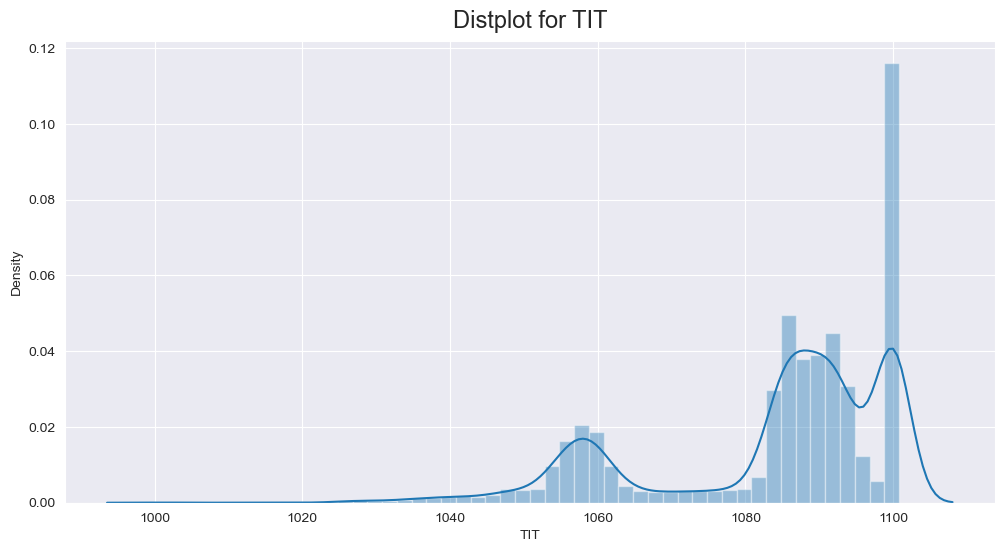

In [22]:

plt.title('Distplot for TIT', fontsize=17, y = 1.01)
sns.distplot(df['TIT'])


<Axes: title={'center': 'Distplot for TAT'}, xlabel='TAT', ylabel='Density'>

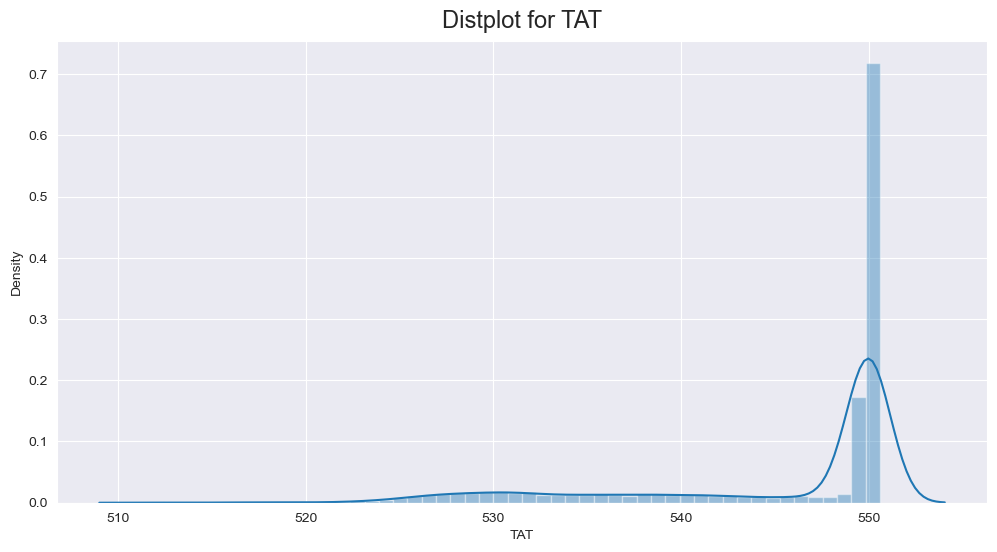

In [23]:

plt.title('Distplot for TAT', fontsize=17, y = 1.01)
sns.distplot(df['TAT'])

<Axes: title={'center': 'Distplot for CDP'}, xlabel='CDP', ylabel='Density'>

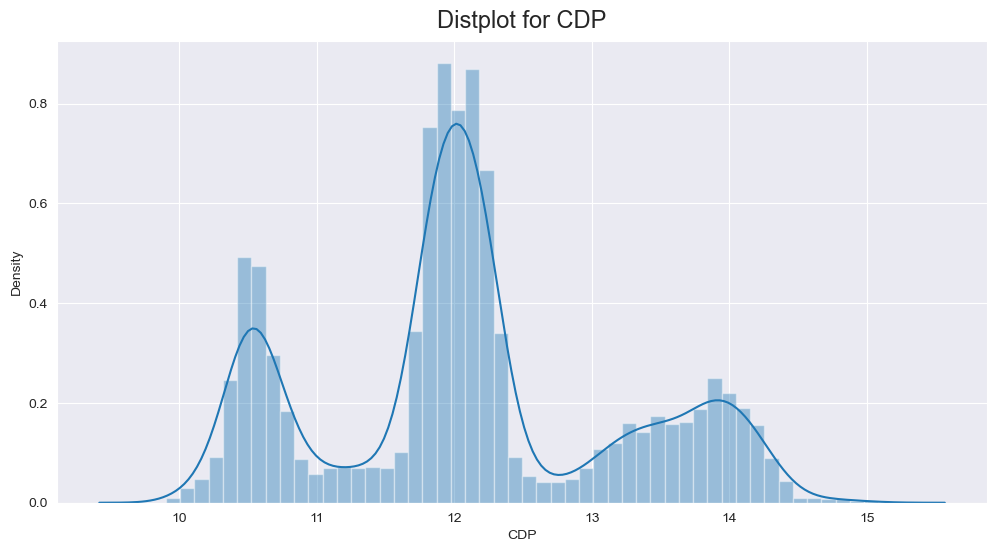

In [24]:

plt.title('Distplot for CDP', fontsize=17, y = 1.01)
sns.distplot(df['CDP'])

<Axes: title={'center': 'Distplot for CO'}, xlabel='CO', ylabel='Density'>

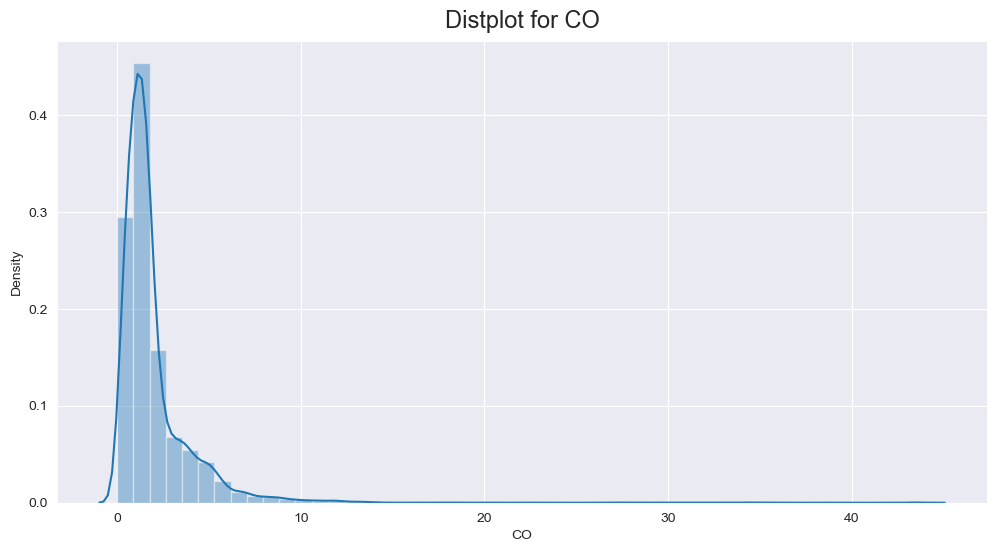

In [25]:

plt.title('Distplot for CO', fontsize=17, y = 1.01)
sns.distplot(df['CO'])

<Axes: title={'center': 'Distplot for NOX'}, xlabel='NOX', ylabel='Density'>

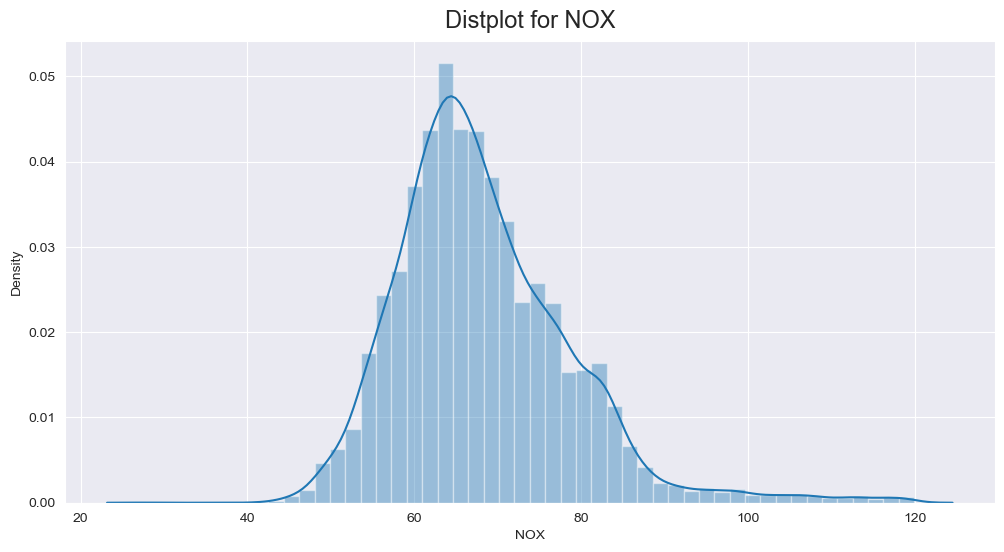

In [26]:

plt.title('Distplot for NOX', fontsize=17, y = 1.01)
sns.distplot(df['NOX'])
     

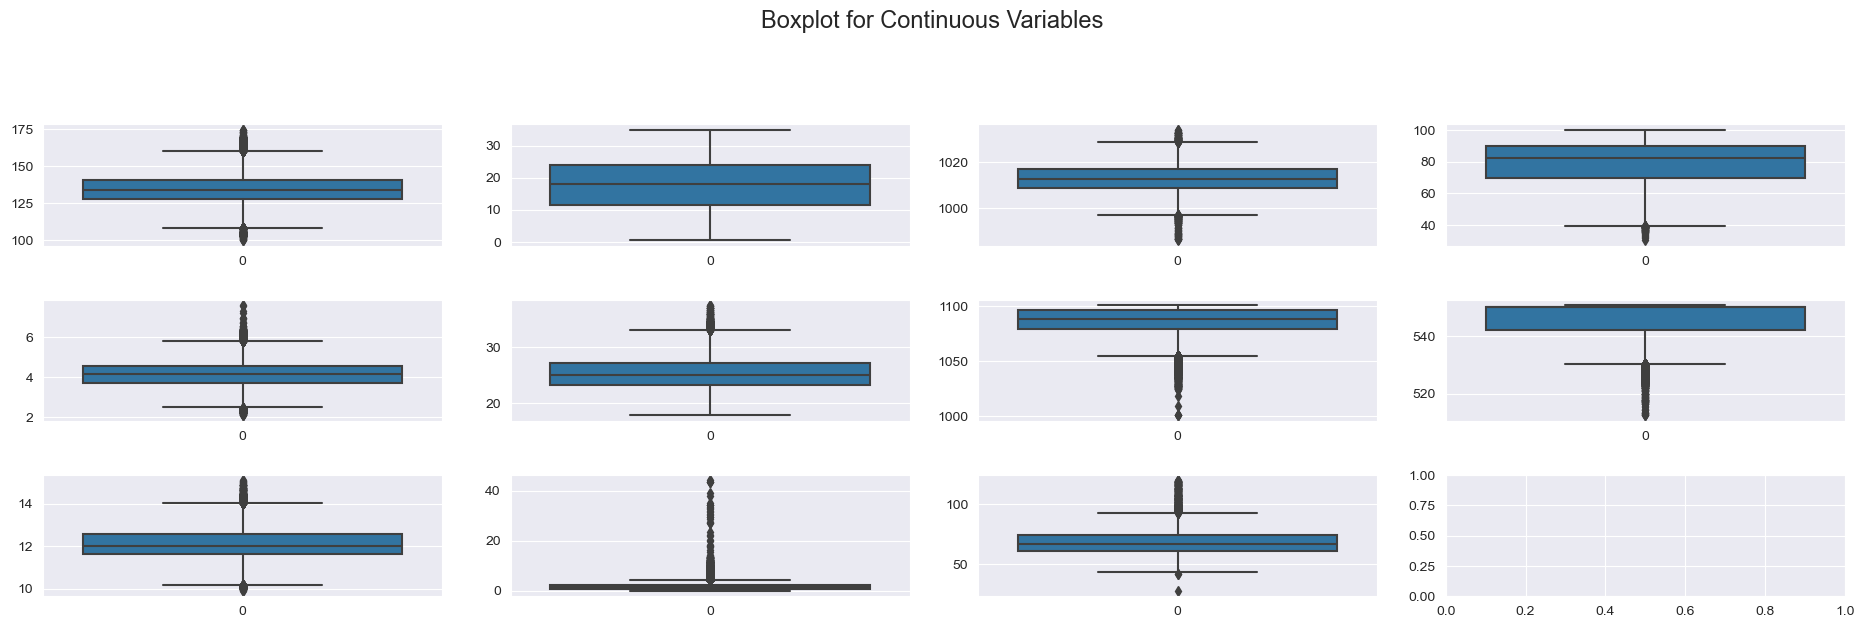

In [27]:
#check for outliers
fig, ax=plt.subplots(3,4, figsize=(19,6), sharex= False, sharey = False)
sns.boxplot(df.TEY, ax=ax[0,0])
sns.boxplot(df.AT, ax=ax[0,1])
sns.boxplot(df.AP, ax=ax[0,2])
sns.boxplot(df.AH, ax=ax[0,3])
sns.boxplot(df.AFDP, ax=ax[1,0])
sns.boxplot(df.GTEP, ax=ax[1,1])
sns.boxplot(df.TIT, ax=ax[1,2])
sns.boxplot(df.TAT, ax=ax[1,3])
sns.boxplot(df.CDP, ax=ax[2,0])
sns.boxplot(df.CO, ax=ax[2,1])
sns.boxplot(df.NOX, ax=ax[2,2])
plt.suptitle("Boxplot for Continuous Variables", fontsize= 17, y = 1.06)
plt.tight_layout(pad=2.0)

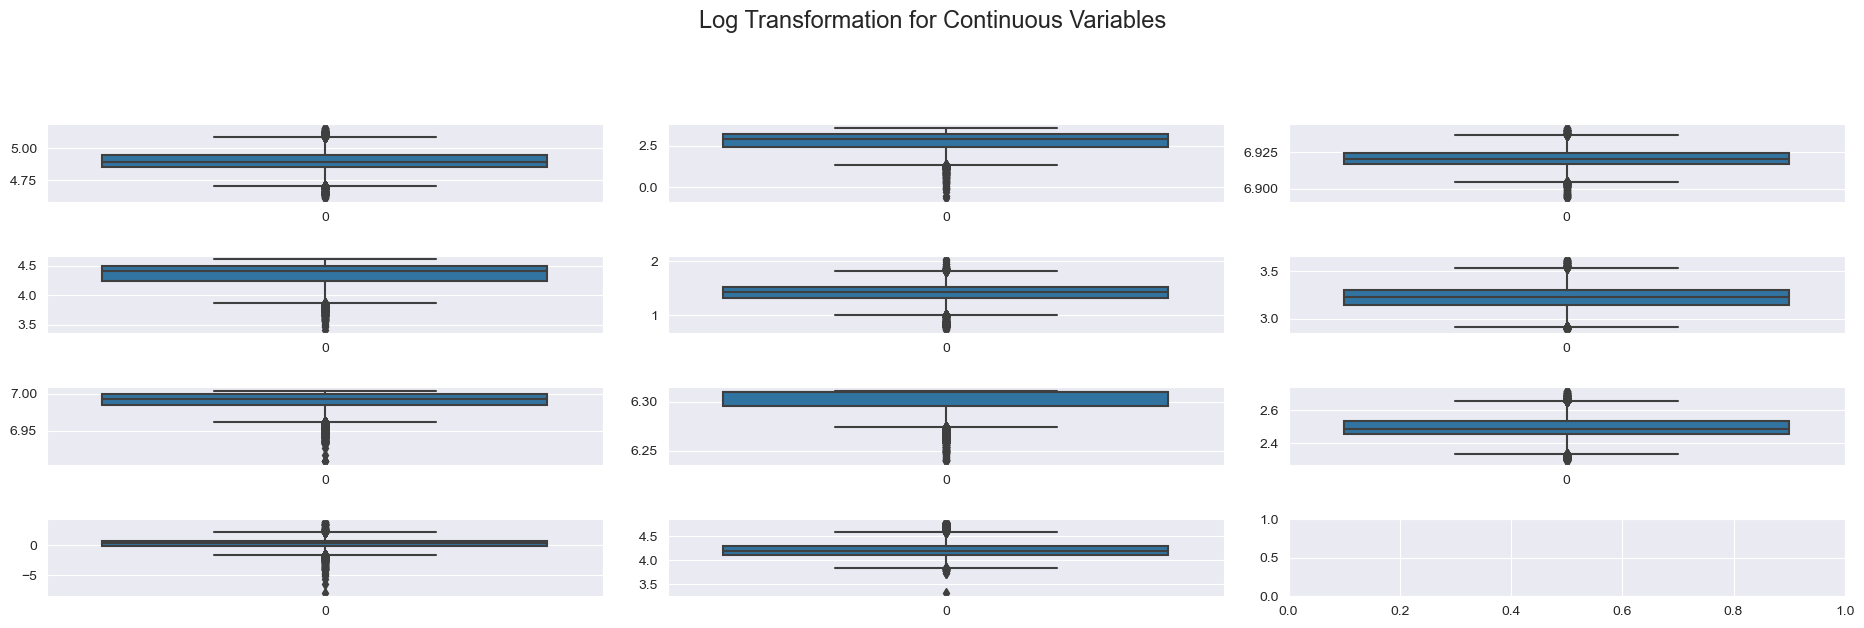

In [28]:
import numpy as np
fig, ax=plt.subplots(4,3, figsize=(19,6), sharex= False, sharey = False)
sns.boxplot(np.log(df.TEY), ax=ax[0,0])
sns.boxplot(np.log(df.AT), ax=ax[0,1])
sns.boxplot(np.log(df.AP), ax=ax[0,2])
sns.boxplot(np.log(df.AH), ax=ax[1,0])
sns.boxplot(np.log(df.AFDP), ax=ax[1,1])
sns.boxplot(np.log(df.GTEP), ax=ax[1,2])
sns.boxplot(np.log(df.TIT), ax=ax[2,0])
sns.boxplot(np.log(df.TAT), ax=ax[2,1])
sns.boxplot(np.log(df.CDP), ax=ax[2,2])
sns.boxplot(np.log(df.CO), ax=ax[3,0])
sns.boxplot(np.log(df.NOX), ax=ax[3,1])
plt.suptitle("Log Transformation for Continuous Variables", fontsize= 17, y = 1.06)
plt.tight_layout(pad=2.0)

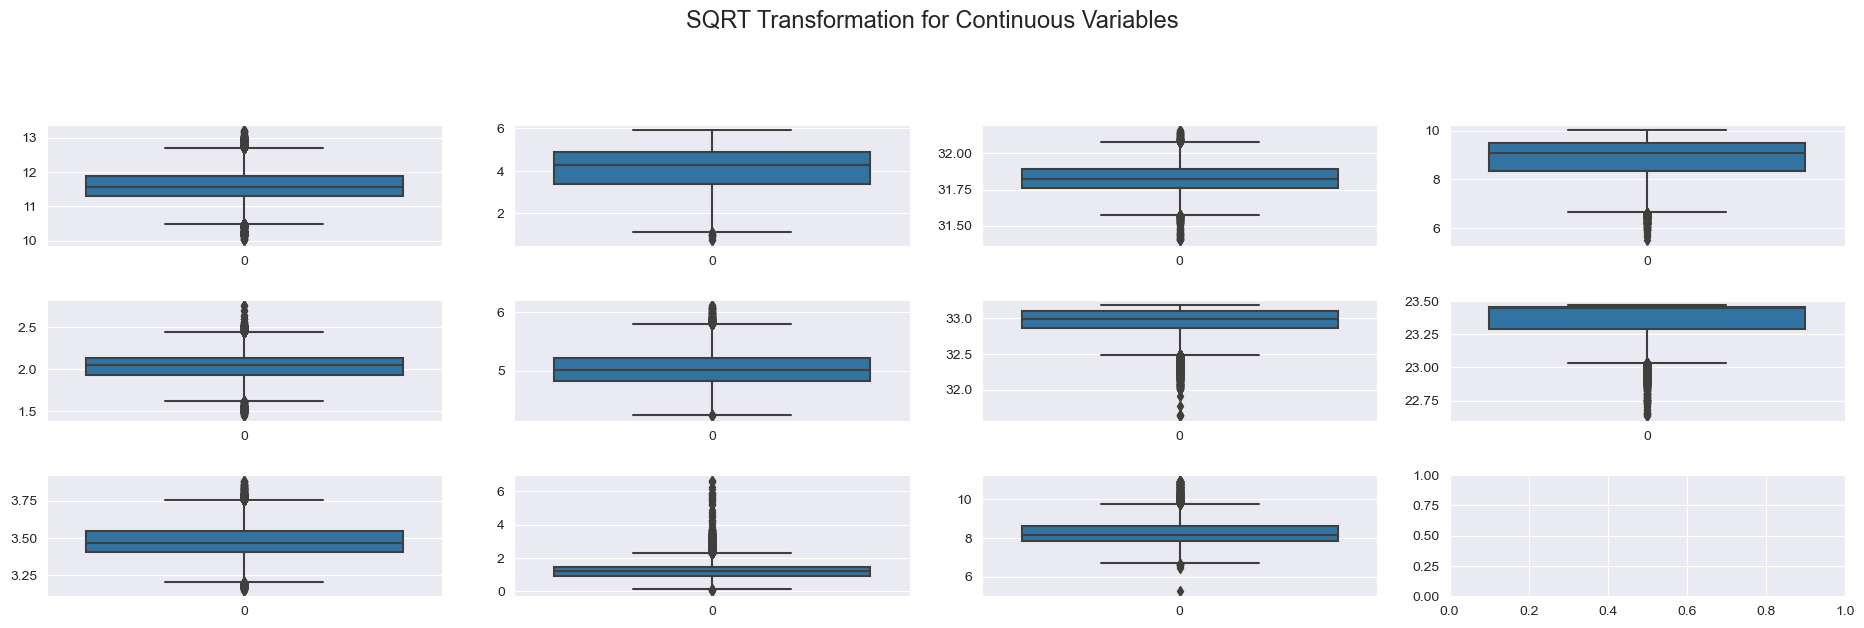

In [29]:

fig, ax=plt.subplots(3,4, figsize=(19,6), sharex= False, sharey = False)
sns.boxplot(np.sqrt(df.TEY), ax=ax[0,0])
sns.boxplot(np.sqrt(df.AT), ax=ax[0,1])
sns.boxplot(np.sqrt(df.AP), ax=ax[0,2])
sns.boxplot(np.sqrt(df.AH), ax=ax[0,3])
sns.boxplot(np.sqrt(df.AFDP), ax=ax[1,0])
sns.boxplot(np.sqrt(df.GTEP), ax=ax[1,1])
sns.boxplot(np.sqrt(df.TIT), ax=ax[1,2])
sns.boxplot(np.sqrt(df.TAT), ax=ax[1,3])
sns.boxplot(np.sqrt(df.CDP), ax=ax[2,0])
sns.boxplot(np.sqrt(df.CO), ax=ax[2,1])
sns.boxplot(np.sqrt(df.NOX), ax=ax[2,2])
plt.suptitle("SQRT Transformation for Continuous Variables", fontsize= 17, y = 1.06)
plt.tight_layout(pad=2.0)
     

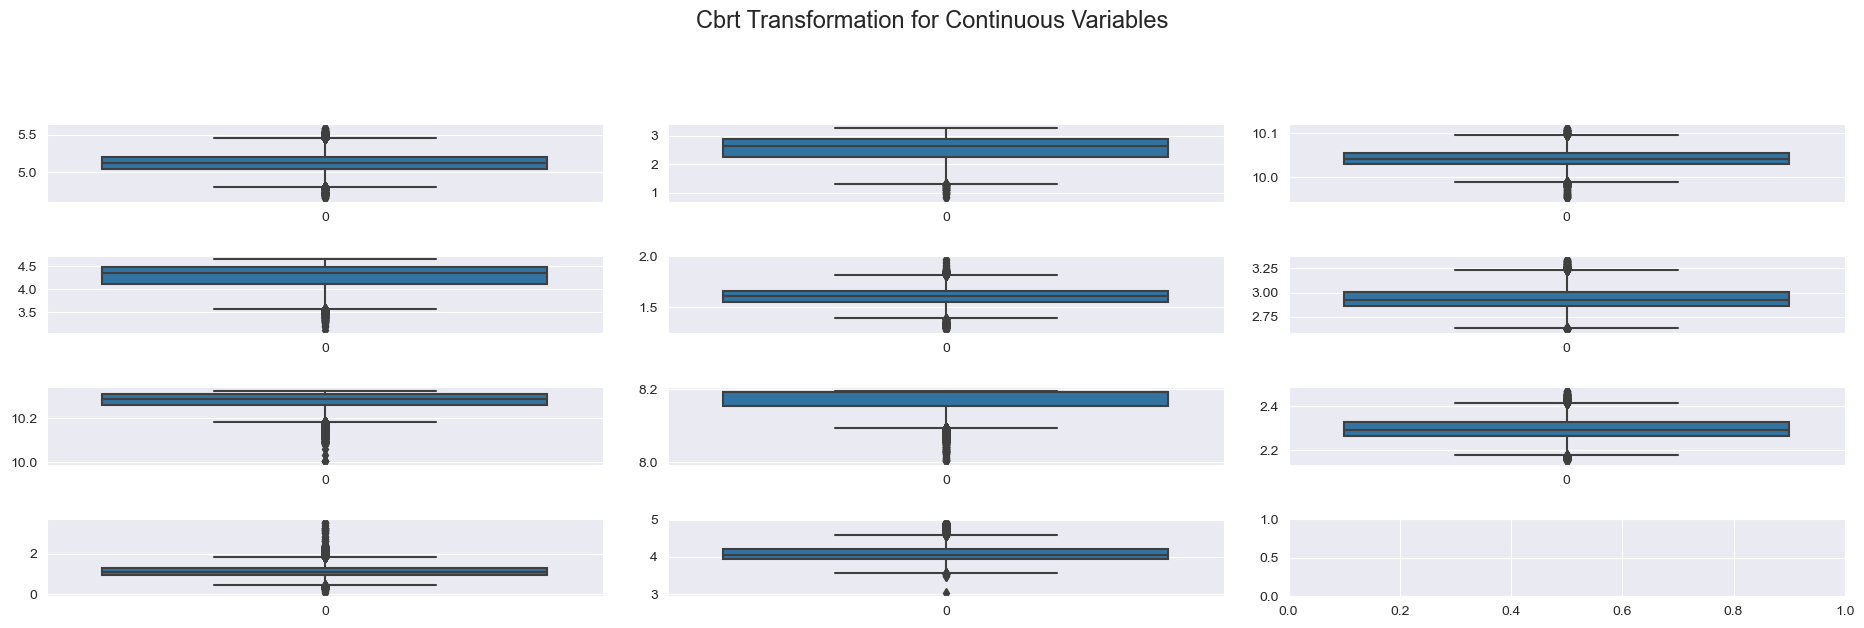

In [30]:
fig, ax=plt.subplots(4,3, figsize=(19,6), sharex= False, sharey = False)
sns.boxplot(np.cbrt(df.TEY), ax=ax[0,0])
sns.boxplot(np.cbrt(df.AT), ax=ax[0,1])
sns.boxplot(np.cbrt(df.AP), ax=ax[0,2])
sns.boxplot(np.cbrt(df.AH), ax=ax[1,0])
sns.boxplot(np.cbrt(df.AFDP), ax=ax[1,1])
sns.boxplot(np.cbrt(df.GTEP), ax=ax[1,2])
sns.boxplot(np.cbrt(df.TIT), ax=ax[2,0])
sns.boxplot(np.cbrt(df.TAT), ax=ax[2,1])
sns.boxplot(np.cbrt(df.CDP), ax=ax[2,2])
sns.boxplot(np.cbrt(df.CO), ax=ax[3,0])
sns.boxplot(np.cbrt(df.NOX), ax=ax[3,1])
plt.suptitle("Cbrt Transformation for Continuous Variables", fontsize= 17, y = 1.06)
plt.tight_layout(pad=2.0)

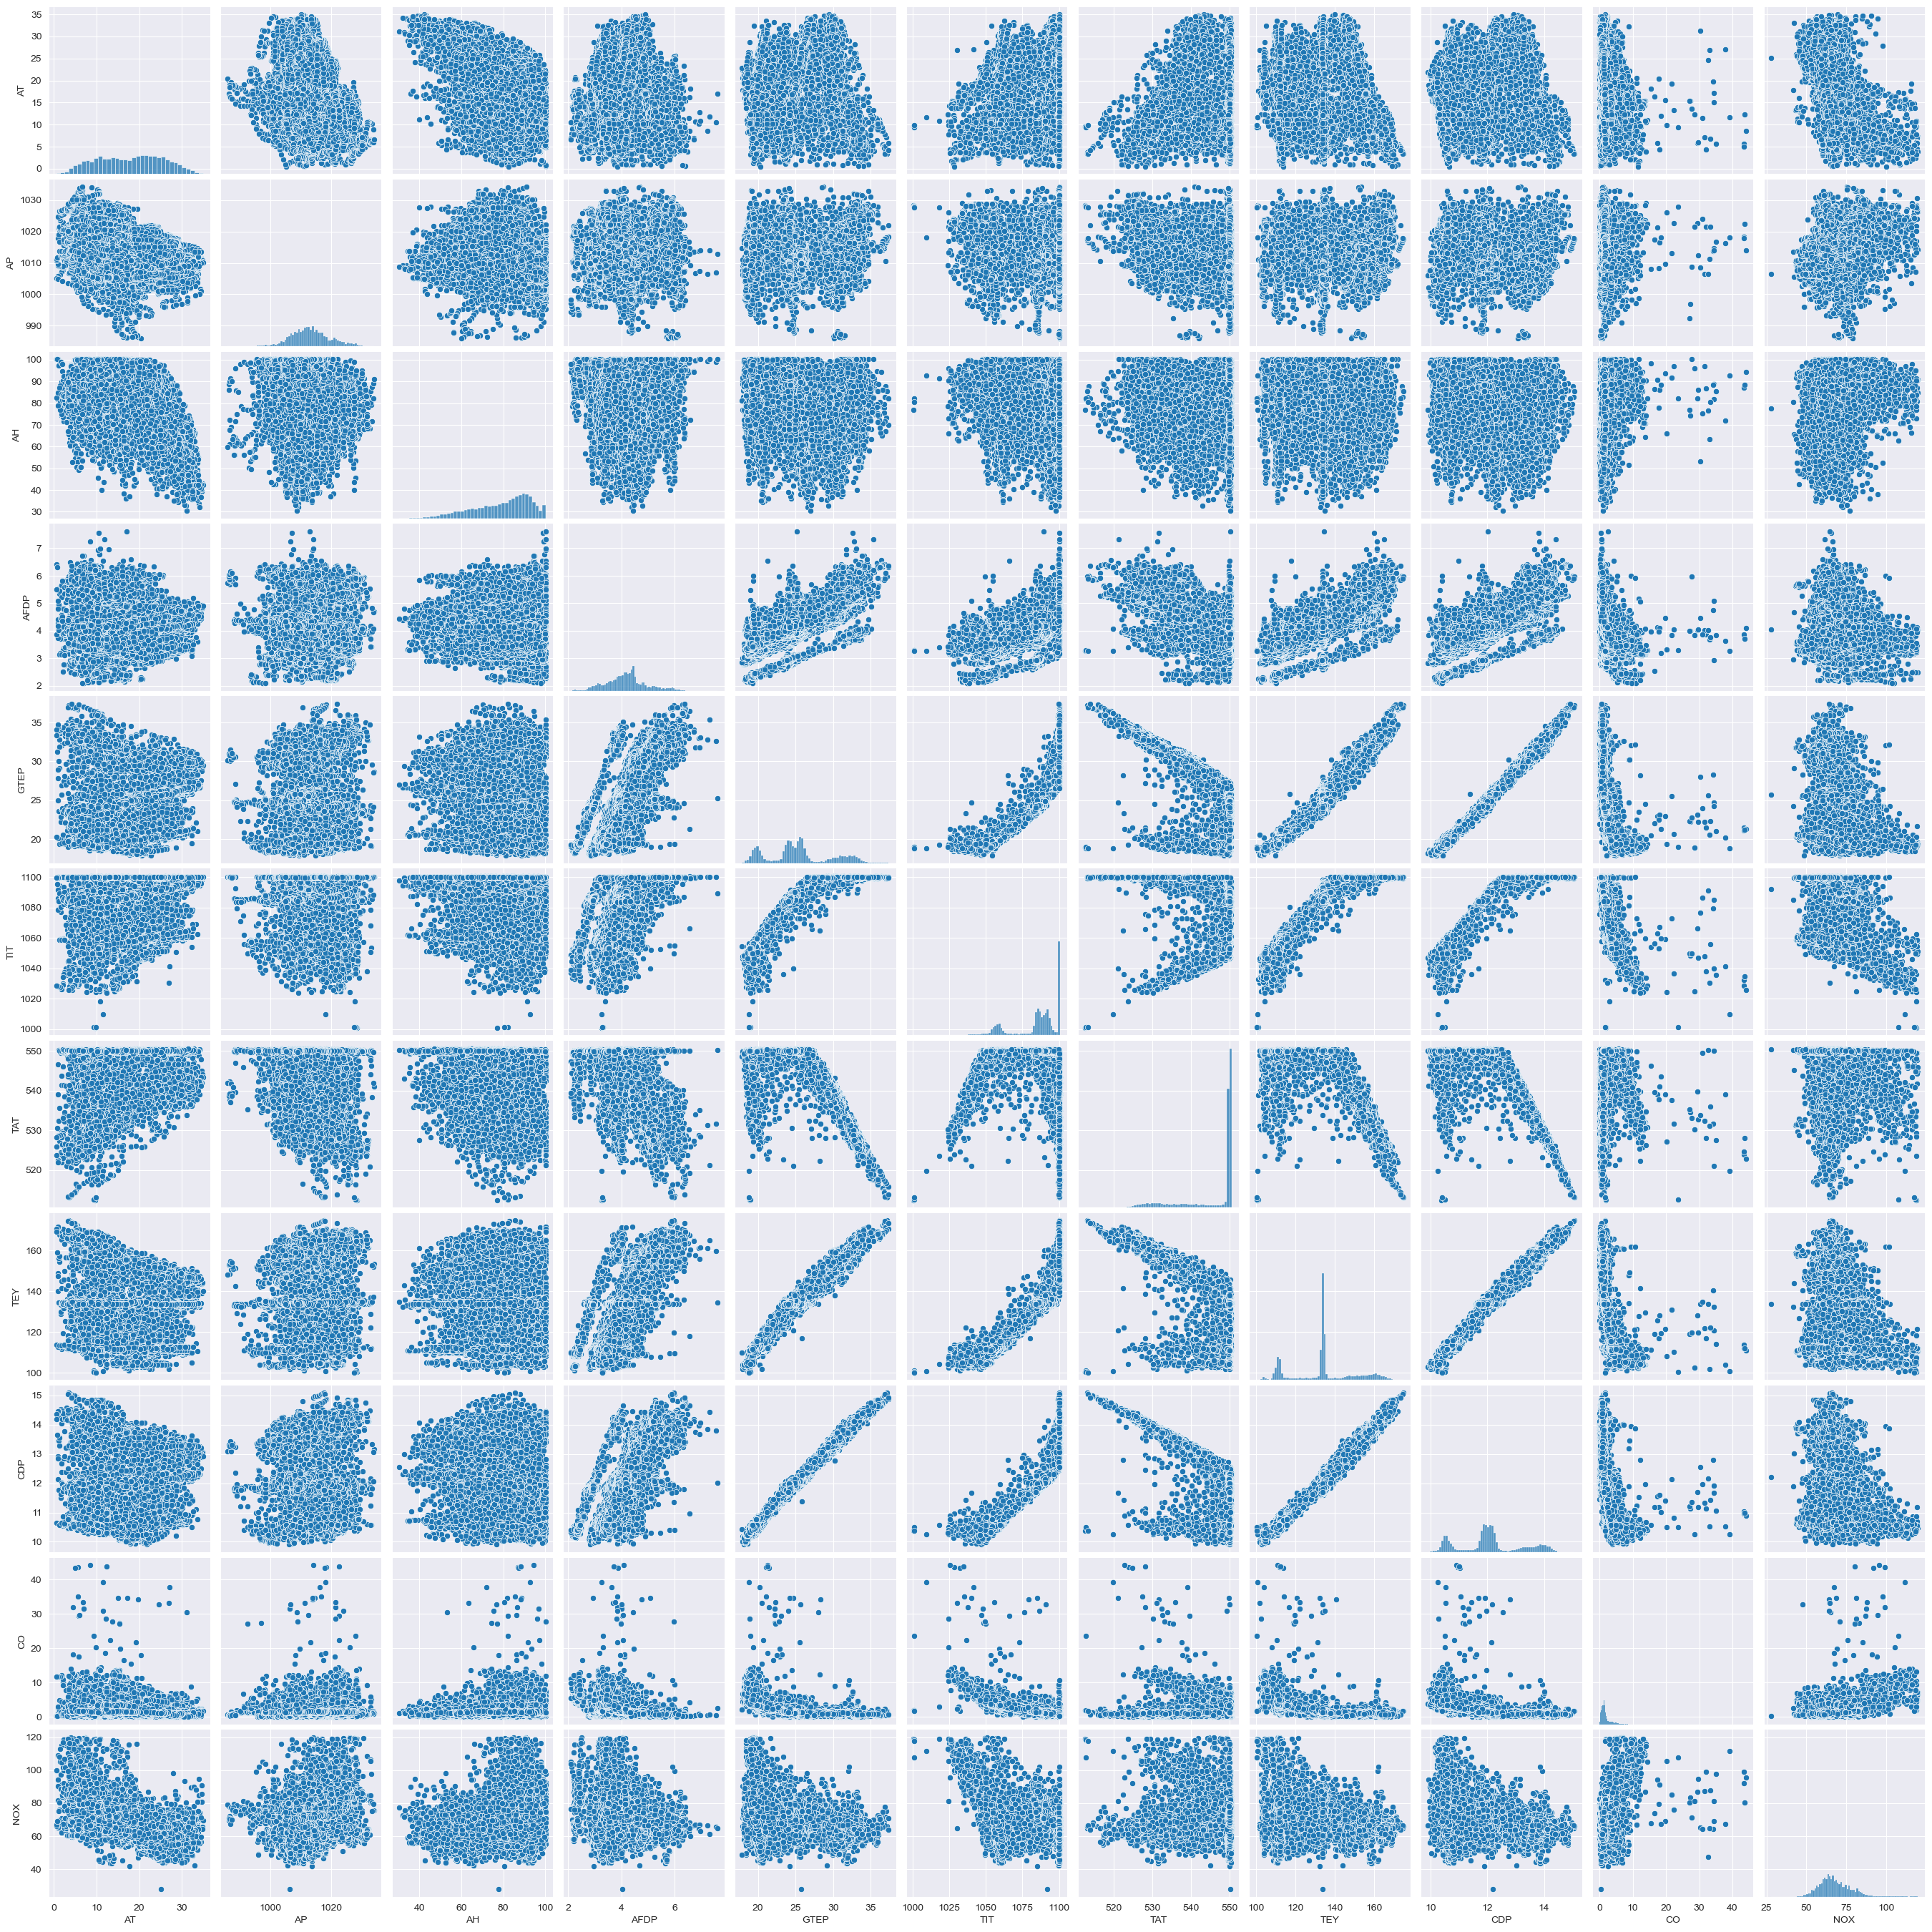

In [31]:

sns.pairplot(df)

In [32]:

corr = pd.DataFrame(data = df.corr().iloc[:,7], index=df.columns)
corr = corr.sort_values(by='TEY', ascending=False)
corr

TEY
TEY   1.000000
CDP   0.988473
GTEP  0.977042
TIT   0.891587
AFDP  0.717995
AP    0.146939
NOX  -0.102631
AH   -0.110272
AT   -0.207495
CO   -0.541751
TAT  -0.720356

<Axes: title={'center': 'Correlation plot between Target variables and independent variables'}, ylabel='TEY'>

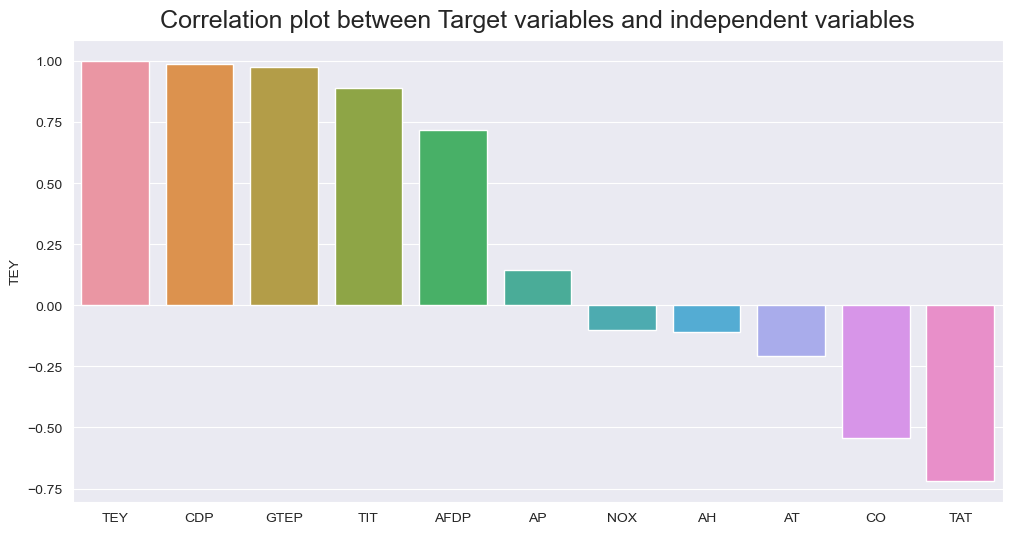

In [33]:
plt.title("Correlation plot between Target variables and independent variables", y=1.01, fontsize=18)
sns.barplot(x = corr.index, y = corr.TEY)

Text(0.5, 1.0, 'Correlation Map of variables')

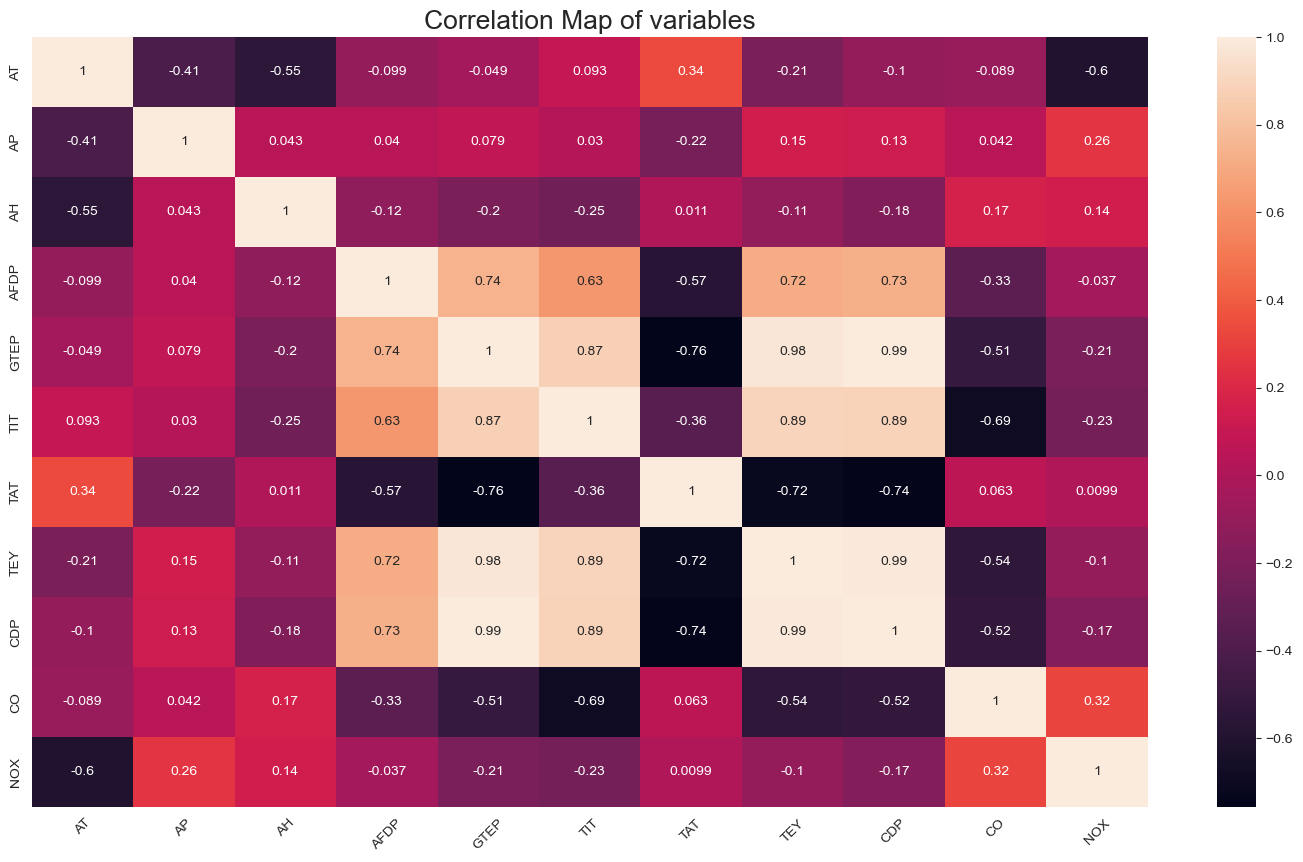

In [34]:
fig= plt.figure(figsize=(18, 10))
sns.heatmap(df.corr(), annot=True);
plt.xticks(rotation=45)
plt.title("Correlation Map of variables", fontsize=19)

In [36]:

%pip install ppscore

Note: you may need to restart the kernel to use updated packages.


In [37]:

import ppscore as PPS
score = PPS.matrix(df)
score_s = score[score['y']=='TEY']
score_s.sort_values(by="ppscore", ascending=False)

x    y   ppscore            case  is_valid_score               metric  \
84    TEY  TEY  1.000000  predict_itself            True                 None   
95    CDP  TEY  0.872285      regression            True  mean absolute error   
51   GTEP  TEY  0.832336      regression            True  mean absolute error   
62    TIT  TEY  0.766040      regression            True  mean absolute error   
73    TAT  TEY  0.226050      regression            True  mean absolute error   
40   AFDP  TEY  0.152509      regression            True  mean absolute error   
106    CO  TEY  0.055869      regression            True  mean absolute error   
7      AT  TEY  0.000000      regression            True  mean absolute error   
18     AP  TEY  0.000000      regression            True  mean absolute error   
29     AH  TEY  0.000000      regression            True  mean absolute error   
117   NOX  TEY  0.000000      regression            True  mean absolute error   

     baseline_score  model_score                    model  
84         0.000000     1.000000                     None  
95        11.172076     1.426840  DecisionTreeRegressor()  
51        11.172076     1.873154  DecisionTreeRegressor()  
62        11.172076     2.613821  DecisionTreeRegressor()  
73        11.172076     8.646631  DecisionTreeRegressor()  
40        11.172076     9.468234  DecisionTreeRegressor()  
106       11.172076    10.547906  DecisionTreeRegressor()  
7         11.172076    16.007470  DecisionTreeRegressor()  
18        11.172076    12.475617  DecisionTreeRegressor()  
29        11.172076    16.950976  DecisionTreeRegressor()  
117       11.172076    14.537337  DecisionTreeRegressor()

Text(0.5, 1.01, 'PPScore of each feature with Target variable')

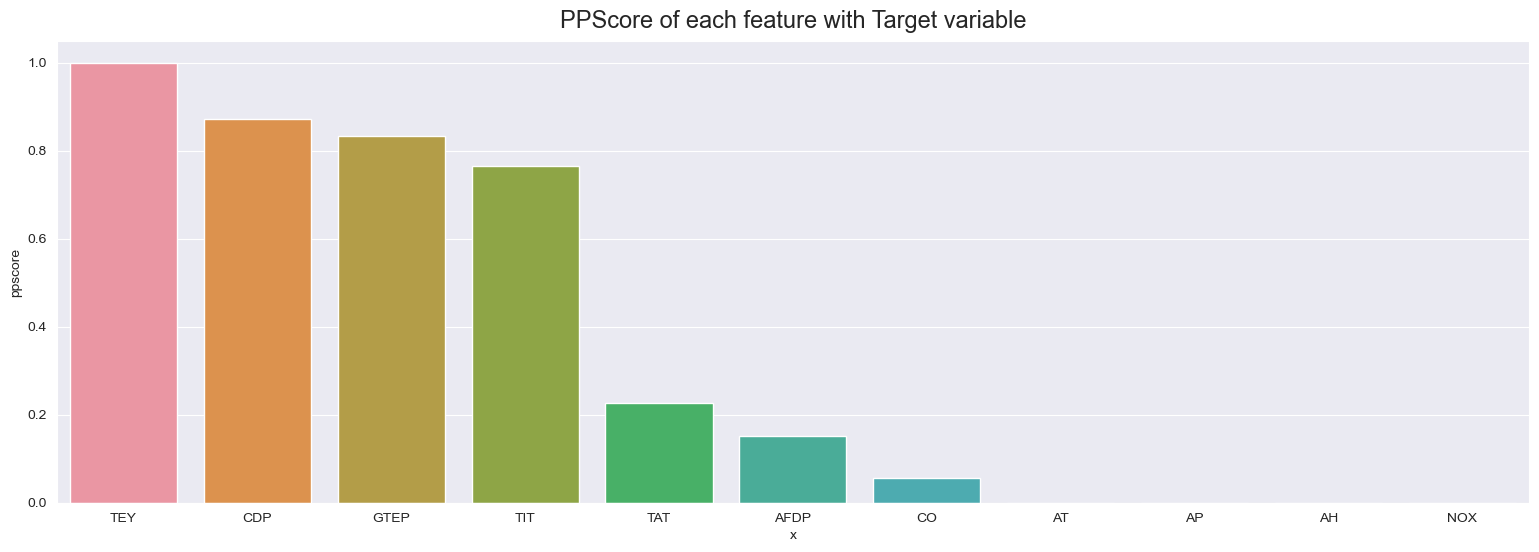

In [38]:

plt.rcParams['figure.figsize']=(19,6)
sns.barplot(x='x', y='ppscore', data=score_s.sort_values(by='ppscore', ascending=False))
plt.title("PPScore of each feature with Target variable", fontsize=17, y=1.01)

In [39]:

#check for outliers
from sklearn.ensemble import IsolationForest
data1=df.copy()

#training the model
clf = IsolationForest(random_state=10, contamination=.001)
clf.fit(data1)
data1['anamoly'] = clf.predict(data1.iloc[:,0:11])
outliers = data1[data1['anamoly']==-1]
     

In [40]:

outliers

AT       AP      AH    AFDP    GTEP     TIT     TAT     TEY  \
261     5.66020  1018.30  86.968  3.8404  21.079  1028.5  523.86  112.02   
553     3.55320  1027.30  90.871  4.2162  21.464  1041.2  531.68  117.76   
763     1.81300  1007.20  74.980  3.6967  19.958  1026.4  528.18  111.72   
764     1.49880  1006.30  76.734  3.7063  20.041  1027.6  528.79  112.28   
765     0.97877  1005.70  78.978  3.7379  20.084  1027.9  528.52  112.71   
993     4.36570  1021.60  85.528  3.9574  20.263  1025.6  525.72  111.35   
6896   17.13200  1010.80  80.503  2.2148  18.484  1034.1  539.98  102.07   
7019    7.02760   997.23  97.761  2.0992  19.227  1037.2  538.53  109.63   
7470    7.04730  1019.60  96.885  2.4558  19.501  1032.0  532.32  109.21   
9920   15.17900  1017.60  71.630  2.7816  18.435  1027.8  533.45  103.64   
13820  14.18300  1023.10  78.110  3.1557  18.869  1025.0  530.16  103.80   
13921  11.58500  1018.20  92.751  3.2518  18.784  1009.5  519.71  100.83   
14100   9.40970  1027.90  82.224  3.3003  18.987  1001.4  512.60  100.32   
14278   9.90780  1026.10  65.923  3.3126  19.366  1024.5  527.21  108.08   
14317   3.93850  1021.30  90.536  3.4765  20.031  1026.6  526.30  111.70   
14320   3.49070  1020.80  91.519  3.5309  20.098  1025.8  525.35  111.91   

          CDP       CO      NOX  anamoly  
261    10.963  43.4280   99.237       -1  
553    10.984   8.8254  106.840       -1  
763    10.553  12.0900  114.940       -1  
764    10.585  11.6520  112.830       -1  
765    10.628  11.6910  108.880       -1  
993    10.652  12.7860  112.270       -1  
6896   10.182  11.5150  110.760       -1  
7019   10.338  11.0440  105.060       -1  
7470   10.567  11.3740  112.230       -1  
9920   10.143  12.1440  113.800       -1  
13820  10.340  13.3130  116.340       -1  
13921  10.253  39.0500  111.780       -1  
14100  10.495  23.6290  107.890       -1  
14278  10.506  20.2710  105.660       -1  
14317  10.683  14.0350  114.700       -1  
14320  10.761  11.9210  113.900       -1

In [41]:

df.shape

(15039, 11)

In [42]:

#drop the outliers
df = df.drop(outliers.index)
df.shape

(15023, 11)

In [43]:

#reset index after dropping outliers
df = df.reset_index()
df = df.drop('index', axis = 1)
df

AT      AP      AH    AFDP    GTEP     TIT     TAT     TEY     CDP  \
0      6.8594  1007.9  96.799  3.5000  19.663  1059.2  550.00  114.70  10.605   
1      6.7850  1008.4  97.118  3.4998  19.728  1059.3  550.00  114.72  10.598   
2      6.8977  1008.8  95.939  3.4824  19.779  1059.4  549.87  114.71  10.601   
3      7.0569  1009.2  95.249  3.4805  19.792  1059.6  549.99  114.72  10.606   
4      7.3978  1009.7  95.150  3.4976  19.765  1059.7  549.98  114.72  10.612   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
15018  9.0301  1005.6  98.460  3.5421  19.164  1049.7  546.21  111.61  10.400   
15019  7.8879  1005.9  99.093  3.5059  19.414  1046.3  543.22  111.78  10.433   
15020  7.2647  1006.3  99.496  3.4770  19.530  1037.7  537.32  110.19  10.483   
15021  7.0060  1006.8  99.008  3.4486  19.377  1043.2  541.24  110.74  10.533   
15022  6.9279  1007.2  97.533  3.4275  19.306  1049.9  545.85  111.58  10.583   

           CO     NOX  
0      3.1547  82.722  
1      3.2363  82.776  
2      3.2012  82.468  
3      3.1923  82.670  
4      3.2484  82.311  
...       ...     ...  
15018  4.5186  79.559  
15019  4.8470  79.917  
15020  7.9632  90.912  
15021  6.2494  93.227  
15022  4.9816  92.498  

[15023 rows x 11 columns]

In [44]:

df = df.drop(['AT', 'AP', 'AH', 'NOX'], axis=1)
     

In [45]:
df.shape
     

(15023, 7)

In [46]:

#Standardize & Normalize the data
norm = MinMaxScaler()
std = StandardScaler()

df_norm = pd.DataFrame(norm.fit_transform(df), columns=df.columns)            #data between -3 to +3
df_std = pd.DataFrame(std.fit_transform(df), columns=df.columns)            #data between -1 to +1
     


In [47]:

#we will take a small model as this is large data and will take huge amount of time to build model
#to reandomly shuffle and select a % of data
temp = df_std.sample(frac=1)          #shuffle all the data
temp_s = df_std.sample(frac=0.1)      #shuffle and select only 10% of the data randomly to train
     

In [48]:
temp_s


AFDP      GTEP       TIT       TAT       TEY       CDP        CO
7543  -1.605079 -0.223216  0.142454  0.586844 -0.023751 -0.220416 -0.083893
8339  -0.384676 -0.443751  0.057225  0.588118  0.014820 -0.218602 -0.568026
4338   1.284823  1.387165  0.970387 -1.033941  0.625004  1.118312  0.006194
11349 -1.863585 -1.770554 -2.213502  0.546069 -1.927019 -1.799498  1.116502
6428  -0.833640 -1.512624 -1.829974  0.572828 -1.644374 -1.589075  1.686988
...         ...       ...       ...       ...       ...       ...       ...
327    1.613089  1.977814  0.976474 -2.611404  2.091974  2.001728 -0.486379
11048 -0.510770  0.005229  0.373788  0.547344 -0.048411  0.055311 -0.574811
788    2.870872  2.790916  0.994738 -3.665169  2.246259  2.478808 -0.125324
4395   0.008612  0.036152  0.428578  0.579199 -0.047147 -0.036295  0.849644
3867  -0.094185  0.061321  0.513806  0.532053  0.034422  0.135127 -0.141449

[1502 rows x 7 columns]

In [49]:

x = temp_s.drop('TEY', axis=1)
y = temp_s['TEY']
x

AFDP      GTEP       TIT       TAT       CDP        CO
7543  -1.605079 -0.223216  0.142454  0.586844 -0.220416 -0.083893
8339  -0.384676 -0.443751  0.057225  0.588118 -0.218602 -0.568026
4338   1.284823  1.387165  0.970387 -1.033941  1.118312  0.006194
11349 -1.863585 -1.770554 -2.213502  0.546069 -1.799498  1.116502
6428  -0.833640 -1.512624 -1.829974  0.572828 -1.589075  1.686988
...         ...       ...       ...       ...       ...       ...
327    1.613089  1.977814  0.976474 -2.611404  2.001728 -0.486379
11048 -0.510770  0.005229  0.373788  0.547344  0.055311 -0.574811
788    2.870872  2.790916  0.994738 -3.665169  2.478808 -0.125324
4395   0.008612  0.036152  0.428578  0.579199 -0.036295  0.849644
3867  -0.094185  0.061321  0.513806  0.532053  0.135127 -0.141449

[1502 rows x 6 columns]

In [50]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [51]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1126, 6), (376, 6), (1126,), (376,))

In [53]:

# Importing the necessary packages
import tensorflow as tf
import keras
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense

from tensorflow.keras.optimizers import Adam
from keras.layers import Dropout
tf.config.experimental.list_physical_devices('GPU')

[]

In [54]:
# create model with 2 hidden layers
def create_model_two_hidden_layers():
    model = Sequential()
    model.add(Dense(5, input_dim=6, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(6, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(10, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(1))
    
    adam=Adam(lr=0.001)
    model.compile(loss='mse', optimizer=adam, metrics=['mse', 'mae', 'mape'])
    return model


In [55]:

model1 = create_model_two_hidden_layers()
print("Here is the summary of the model:")
model1.summary()

Here is the summary of the model:
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 35        
                                                                 
 dense_1 (Dense)             (None, 6)                 36        
                                                                 
 dense_2 (Dense)             (None, 10)                70        
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 152 (608.00 Byte)
Trainable params: 152 (608.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [56]:
#create a model with 3 hidden layers
def create_model_three_hidden_layers():
    model = Sequential()
    model.add(Dense(32, input_dim=6, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(32, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(64, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(128, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(1))
    
    adam=Adam(lr=0.01)
    model.compile(loss='mse', optimizer=adam, metrics=['mse', 'mae', 'mape'])
    return model


In [57]:

model2 = create_model_three_hidden_layers()
print("Here is the summary of the model2:")
model2.summary()
     

Here is the summary of the model2:
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 32)                224       
                                                                 
 dense_5 (Dense)             (None, 32)                1056      
                                                                 
 dense_6 (Dense)             (None, 64)                2112      
                                                                 
 dense_7 (Dense)             (None, 128)               8320      
                                                                 
 dense_8 (Dense)             (None, 1)                 129       
                                                                 
Total params: 11841 (46.25 KB)
Trainable params: 11841 (46.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________

In [58]:

%%time
epochs=500
batch_size=50

print("Here is the summary of this model:")
model2.summary()

with tf.device('/GPU:0'):
  model2.fit(x_train,y_train, verbose = 0,batch_size = batch_size,epochs = epochs, shuffle=True)

Here is the summary of this model:
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 32)                224       
                                                                 
 dense_5 (Dense)             (None, 32)                1056      
                                                                 
 dense_6 (Dense)             (None, 64)                2112      
                                                                 
 dense_7 (Dense)             (None, 128)               8320      
                                                                 
 dense_8 (Dense)             (None, 1)                 129       
                                                                 
Total params: 11841 (46.25 KB)
Trainable params: 11841 (46.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________

CPU times: total: 12.8 s
Wall time: 30.3 s


In [59]:

print("Predicted values:")
model2.predict(x_test[:10])

Predicted values:
1/1 [==============================] - 0s 214ms/step


array([[-0.02813345],
       [ 1.5456145 ],
       [ 0.39806235],
       [ 1.1850948 ],
       [-0.04221315],
       [-0.00836281],
       [ 0.04693349],
       [ 0.695322  ],
       [-0.12683876],
       [ 0.81315   ]], dtype=float32)

In [60]:

print('Actual values')
y_test[:10]
     

Actual values


13382    0.097653
9607     1.429308
10735    0.494747
13614    1.103034
5896    -0.071807
4820     0.035054
9032     0.028731
12133    0.658517
8112    -0.083821
12121    0.791303
Name: TEY, dtype: float64

In [62]:
loss, mae, mse, mape = model2.evaluate(x_train, y_train)
print('\n', "Results for model 2:", '\n', "Training Loss:", loss, '\n', "Training Mean Absolute Error:" , mae, '\n', "Training Mean Squared Error:", mse)


36/36 [==============================] - 0s 2ms/step - loss: 0.0044 - mse: 0.0044 - mae: 0.0506 - mape: 132.3374

 Results for model 2: 
 Training Loss: 0.004358913749456406 
 Training Mean Absolute Error: 0.004358913749456406 
 Training Mean Squared Error: 0.0506020151078701


In [63]:
loss, mae, mse, mape = model2.evaluate(x_test, y_test)
print('\n', "Results for model 2:", '\n', "Test Loss:", loss, '\n', "Test Mean Absolute Error:" , mae, '\n', "Test Mean Squared Error:", mse)
     

12/12 [==============================] - 0s 4ms/step - loss: 0.0072 - mse: 0.0072 - mae: 0.0631 - mape: 367.9721

 Results for model 2: 
 Test Loss: 0.007189636584371328 
 Test Mean Absolute Error: 0.007189636584371328 
 Test Mean Squared Error: 0.06305742263793945
